In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [ ]:
import pandas as pd
from google.oauth2 import service_account


service_account_json_path = 'swift-terra-405619-f5f3188f542f.json'


credentials = service_account.Credentials.from_service_account_file(service_account_json_path)
project_id = credentials.project_id
query_config = {
    'query': {
        'use_legacy_sql': False,
    }
}


query = """
SELECT * FROM `swift-terra-405619.FC24_PLAYER_RATINGS2.fc24_upload` ORDER BY Rank ASC
"""




In [ ]:
fc24 = pd.read_gbq(query, project_id=project_id, credentials=credentials, configuration=query_config)


In [3]:
fc24

,Positioning,Rank,Player Name,OVR,PAC,SHO,PAS,DRİ,DEF,PHY,Position,Acceleration,Sprint Speed,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Shot Passing,Long Passing,Curve,Agility,Balance,Reactions,Ball Control,Detailed Dribbling,Composure,Interception,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Age,Att_Work_Rate,Def_Work_Rate,Age.1,Foot,Height,League,Nation,Team,Weight
0,93,1,Kylian Mbappé,91,97,90,80,92,36,78,ST,97,97,94,90,83,84,84,83,78,69,86,71,80,93,82,93,92,93,88,38,73,26,34,32,88,88,77,64,24,High,Low,24,Right,18,Ligue 1 Uber Eats,France,Paris SG,75
1,91,2,Alexia Putellas,91,82,90,91,92,72,78,CM,81,82,91,86,89,90,91,91,88,89,94,91,89,90,89,92,94,92,92,78,74,60,81,64,84,85,78,70,29,High,Medium,29,Left,17,Liga F,Spain,FC Barcelona,67
2,96,3,Erling Haaland,91,89,93,66,80,45,88,ST,82,94,96,94,86,90,84,74,47,62,77,53,77,76,72,94,82,79,87,43,83,38,47,29,93,76,93,87,23,High,Medium,23,Left,19,Premier League,Norway,Manchester City,94
3,88,4,Kevin De Bruyne,91,72,88,94,87,65,78,CM,72,72,85,92,92,83,83,95,95,83,94,94,92,74,78,92,92,86,88,66,55,66,70,53,72,88,74,75,32,High,Medium,32,Right,18,Premier League,Belgium,Manchester City,75
4,91,5,Aitana Bonmatí,90,81,84,83,91,75,73,CM,82,80,91,69,89,62,70,90,67,67,91,87,76,93,86,91,91,91,85,88,54,70,81,67,75,80,75,60,25,High,High,25,Right,16,Liga F,Spain,FC Barcelona,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17321,41,173,Deven Sawhney,47,62,26,34,42,43,57,LB,64,61,24,25,27,25,34,36,37,34,33,28,31,57,64,39,35,41,36,41,35,40,48,47,45,57,57,58,21,High,Medium,21,Left,17,Hero ISL,India,Odisha FC,70
17322,38,173,Wang Tengda,47,61,37,45,48,43,47,CM,61,61,38,38,37,32,35,46,35,35,53,48,30,61,74,48,45,45,39,48,49,35,46,44,38,56,42,51,22,Medium,Medium,22,Right,17,CSL,China PR,Dalian Pro,66
17323,37,173,Wu Yuhang,47,56,34,43,45,43,51,CDM,51,60,31,40,32,26,41,35,35,34,51,50,32,57,60,45,42,43,39,43,42,40,45,51,38,49,51,56,22,Medium,Medium,22,Right,18,CSL,China PR,Zhejiang Pro,75
17324,28,173,Ye Daoxin,47,58,28,33,39,49,48,CB,61,55,25,38,24,26,33,32,26,28,41,28,22,48,73,51,29,38,36,46,42,52,50,46,38,50,48,46,18,Medium,Medium,18,Right,17,CSL,China PR,Zhejiang Pro,70


In [4]:
dropped_columns = ["Rank","Player Name", "PAC","SHO","PAS","DRİ","DEF","PHY","Age.1","Height","League","Nation","Team","Weight"]
fc24.drop(dropped_columns,inplace=True,axis=1)

In [5]:
#Bilgilendirme:
"""
CAM (Central Attacking Midfielder (Merkez Ofansif Orta Saha)) 
CB (Center Back (Stoper))
CDM (Central Defensive Midfielder (Merkez Defansif Orta Saha)
CF(Center Forward (Forvet) - Santrafor) 
CM (Central Midfielder (Merkez Orta Saha)) 
GK (Goalkeeper (Kaleci))
LB ( Left Back (Sol Bek))
LM ( Left Midfielder (Sol Orta Saha))
LW (Left Winger (Sol Kanat)) 
LWB (Left Wing Back (Sol Kanat Bek)) 
RB (Right Back (Sağ Bek))
RM (Right Midfielder (Sağ Orta Saha)) 
RW (Right Winger (Sağ Kanat))
RWB (Right Wing Back (Sağ Kanat Bek))
ST (Striker (Forvet))
----------------------------------------
Oyuncu Rolleri Temelinde Kategorizasyon:

Hücumcu: CF, ST, LW, RW
Orta Saha Oyuncusu: CAM, CDM, CM, LM, RM
Defans Oyuncusu: CB, LB, RB, LWB, RWB
Kaleci: GK

"""

'\nCAM (Central Attacking Midfielder (Merkez Ofansif Orta Saha)) \nCB (Center Back (Stoper))\nCDM (Central Defensive Midfielder (Merkez Defansif Orta Saha)\nCF(Center Forward (Forvet) - Santrafor) \nCM (Central Midfielder (Merkez Orta Saha)) \nGK (Goalkeeper (Kaleci))\nLB ( Left Back (Sol Bek))\nLM ( Left Midfielder (Sol Orta Saha))\nLW (Left Winger (Sol Kanat)) \nLWB (Left Wing Back (Sol Kanat Bek)) \nRB (Right Back (Sağ Bek))\nRM (Right Midfielder (Sağ Orta Saha)) \nRW (Right Winger (Sağ Kanat))\nRWB (Right Wing Back (Sağ Kanat Bek))\nST (Striker (Forvet))\n----------------------------------------\nOyuncu Rolleri Temelinde Kategorizasyon:\n\nHücumcu: CF, ST, LW, RW\nOrta Saha Oyuncusu: CAM, CDM, CM, LM, RM\nDefans Oyuncusu: CB, LB, RB, LWB, RWB\nKaleci: GK\n\n'

In [6]:
# Pozisyonları kategorilere eşleştirmek için bir sözlük oluşturalım
pozisyon_kategori = {
    'Hücum Hattı': ['CF', 'ST', 'LW', 'RW'],
    'Orta Saha': ['CAM', 'CDM', 'CM', 'LM', 'RM'],
    'Defans': ['CB', 'LB', 'RB', 'LWB', 'RWB'],
    'Kale': ['GK']
}

# Yeni bir 'Kategori' sütunu ekleyerek kategorileri atayalım
fc24['Kategori'] = fc24['Position'].apply(lambda x: next((kategori for kategori, pozisyonlar in pozisyon_kategori.items() if x in pozisyonlar), None))
fc24.drop(["Position"],axis=1 , inplace=True)
fc24.head()

,Positioning,OVR,Acceleration,Sprint Speed,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Shot Passing,Long Passing,Curve,Agility,Balance,Reactions,Ball Control,Detailed Dribbling,Composure,Interception,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Age,Att_Work_Rate,Def_Work_Rate,Foot,Kategori
0,93,91,97,97,94,90,83,84,84,83,78,69,86,71,80,93,82,93,92,93,88,38,73,26,34,32,88,88,77,64,24,High,Low,Right,Hücum Hattı
1,91,91,81,82,91,86,89,90,91,91,88,89,94,91,89,90,89,92,94,92,92,78,74,60,81,64,84,85,78,70,29,High,Medium,Left,Orta Saha
2,96,91,82,94,96,94,86,90,84,74,47,62,77,53,77,76,72,94,82,79,87,43,83,38,47,29,93,76,93,87,23,High,Medium,Left,Hücum Hattı
3,88,91,72,72,85,92,92,83,83,95,95,83,94,94,92,74,78,92,92,86,88,66,55,66,70,53,72,88,74,75,32,High,Medium,Right,Orta Saha
4,91,90,82,80,91,69,89,62,70,90,67,67,91,87,76,93,86,91,91,91,85,88,54,70,81,67,75,80,75,60,25,High,High,Right,Orta Saha


In [7]:
priority_order = ['Low','Medium','High']


def custom_label_encoding(value):
    return priority_order.index(value)


fc24['Att_Work_Rate'] = fc24['Att_Work_Rate'].apply(lambda x: custom_label_encoding(x) if x in priority_order else x)


fc24['Att_Work_Rate'].head(10)

0    2
1    2
2    2
3    2
4    2
5    0
6    2
7    1
8    1
9    2
Name: Att_Work_Rate, dtype: int64

In [8]:
priority_order = ['Low','Medium','High']

def custom_label_encoding(value):
    return priority_order.index(value)

fc24['Def_Work_Rate'] = fc24['Def_Work_Rate'].apply(lambda x: custom_label_encoding(x) if x in priority_order else x)

fc24['Def_Work_Rate'].head()

0    0
1    1
2    1
3    1
4    2
Name: Def_Work_Rate, dtype: int64

In [9]:
label_encoder = LabelEncoder()
fc24['Kategori'] = label_encoder.fit_transform(fc24["Kategori"])
fc24["Kategori"].head(10)

#Bilgilendirme:
"""
Pozisyon Kategori'lerinin Encoding Karşılığı

'Defans': ['CB', 'LB', 'RB', 'LWB', 'RWB'],     = 0
'Hücum Hattı': ['CF', 'ST', 'LW', 'RW'],        = 1
'Kale': ['GK']                                  = 2
'Orta Saha': ['CAM', 'CDM', 'CM', 'LM', 'RM'],  = 3

"""

"\nPozisyon Kategori'lerinin Encoding Karşılığı\n\n'Defans': ['CB', 'LB', 'RB', 'LWB', 'RWB'],     = 0\n'Hücum Hattı': ['CF', 'ST', 'LW', 'RW'],        = 1\n'Kale': ['GK']                                  = 2\n'Orta Saha': ['CAM', 'CDM', 'CM', 'LM', 'RM'],  = 3\n\n"

In [10]:
label_encoder = LabelEncoder()
fc24['Foot'] = label_encoder.fit_transform(fc24["Foot"])
fc24["Foot"].head()

0    1
1    0
2    0
3    1
4    1
Name: Foot, dtype: int32

In [11]:
veri_seti = fc24.drop(['Standing Tackle', 'Sliding Tackle', 'Def Awareness','Ball Control','Detailed Dribbling'], axis=1)

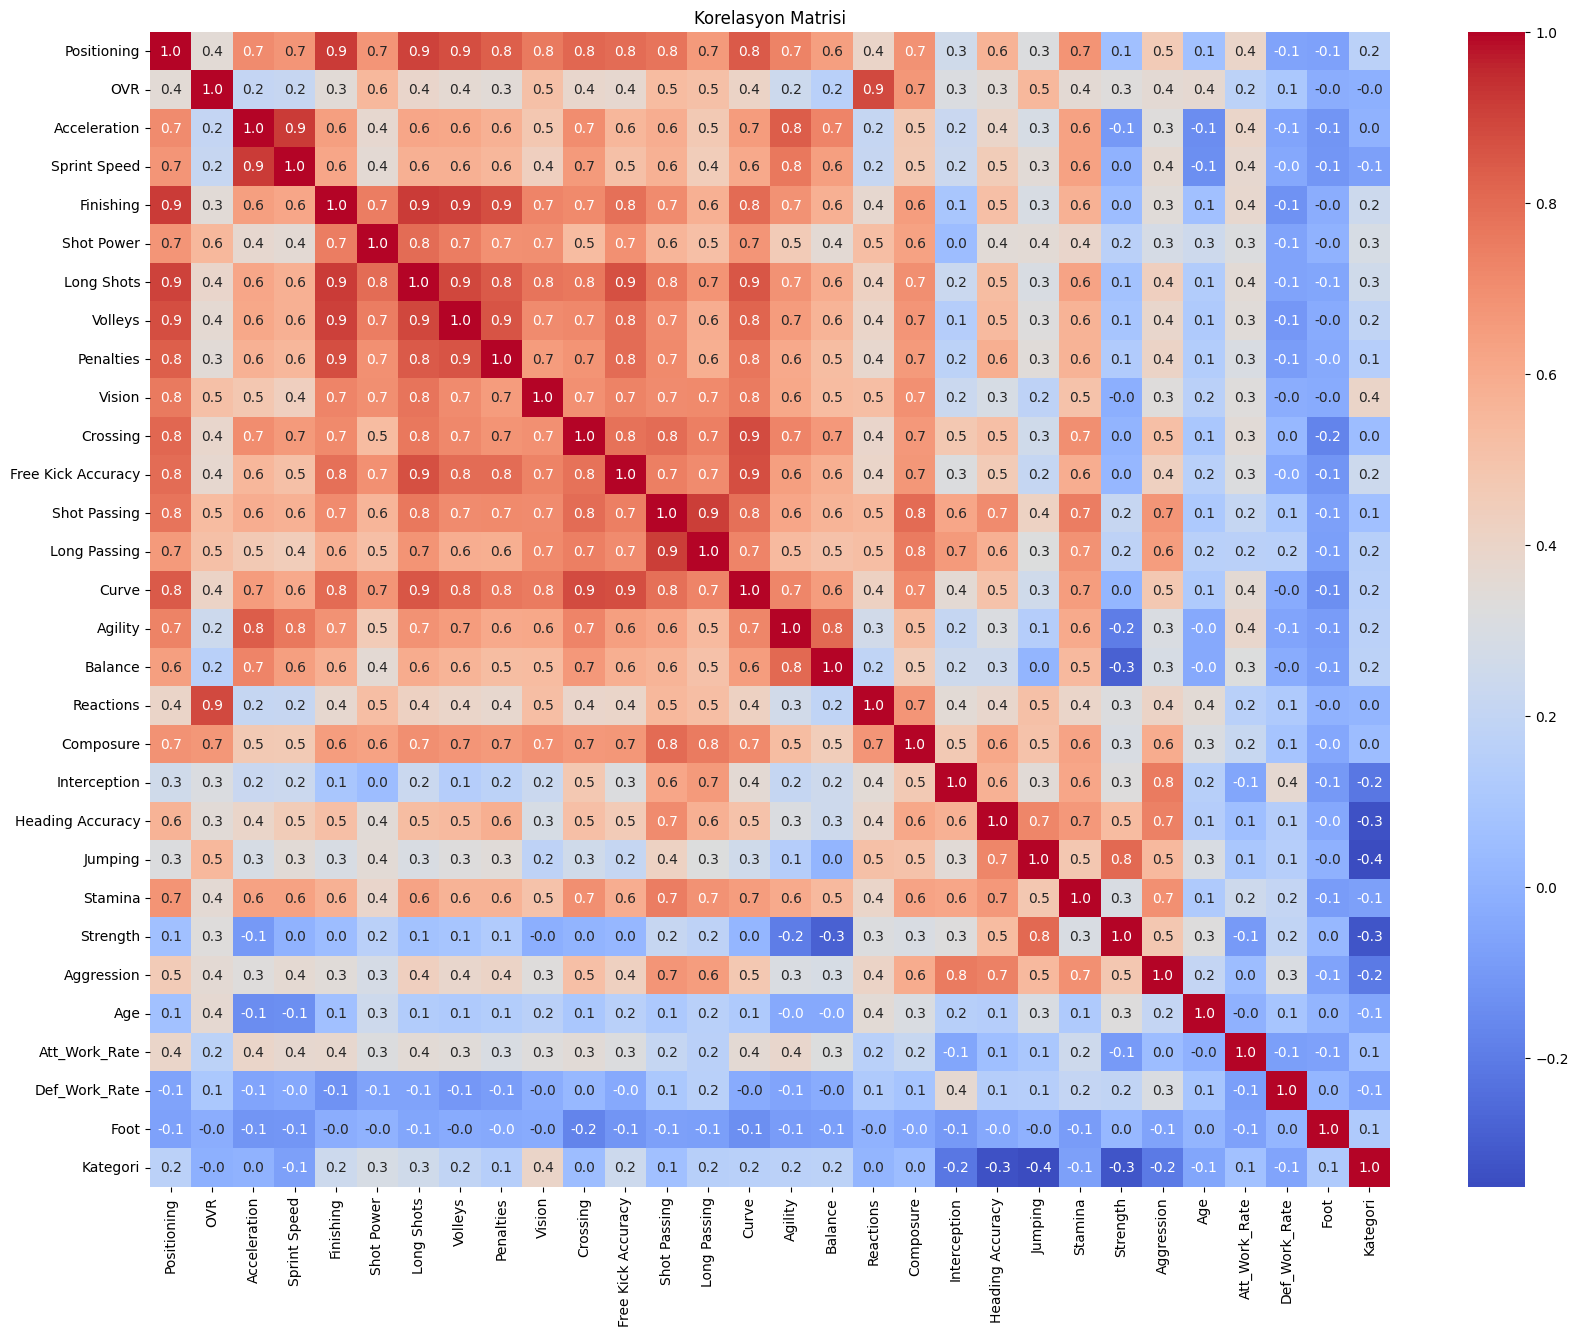

In [12]:
correlation_matrix = veri_seti.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Korelasyon Matrisi')
plt.show()

In [13]:
X = fc24.drop(["Kategori"],axis=1)
y = fc24["Kategori"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [01:50<00:02,  2.79s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 13860, number of used features: 34
[LightGBM] [Info] Start training from score -1.080169
[LightGBM] [Info] Start training from score -1.676963
[LightGBM] [Info] Start training from score -2.183040
[LightGBM] [Info] Start training from score -1.019369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [01:52<00:00,  3.89s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.89,0.90,None,0.89,0.70
XGBClassifier,0.89,0.89,None,0.89,2.82
SVC,0.89,0.89,None,0.89,9.77
LinearDiscriminantAnalysis,0.88,0.89,None,0.88,0.19
LGBMClassifier,0.88,0.89,None,0.88,2.26
RandomForestClassifier,0.88,0.89,None,0.88,9.22
CalibratedClassifierCV,0.88,0.89,None,0.88,4.24
LinearSVC,0.88,0.89,None,0.88,6.75
SGDClassifier,0.88,0.89,None,0.88,0.44


In [17]:
# Sınıf isimleri
class_names = ['Defans', 'Hücum Hattı', 'Kale', 'Orta Saha']

# Classification report'u oluştururken target_names parametresini kullanma
classification_rep_log = classification_report(y_test, y_pred_log, target_names=class_names)

# Model performans metrikleri
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average='micro')
recall_log = recall_score(y_test, y_pred_log, average='micro')
f1_log = f1_score(y_test, y_pred_log, average='micro')

model_name_log = "Logistic Regression Model"
print(f'Model Name: {model_name_log}')
print(f'Model Accuracy: {accuracy_log}')
print(f'Precision: {precision_log}')
print(f'Recall: {recall_log}')
print(f'F1 Score: {f1_log}')

# Sınıflandırma raporu
print("\nClassification Report:")
print(classification_rep_log)

NameError: name 'y_pred_log' is not defined

In [ ]:
# RandomForestClassifier modelini oluşturma
model_rf = RandomForestClassifier()

# Modeli eğitme
model_rf.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_rf = model_rf.predict(X_test)

# Sınıf isimleri
class_names = ['Defans', 'Hücum Hattı', 'Kale', 'Orta Saha']

# Classification report'u oluştururken target_names parametresini kullanma
classification_rep_rf = classification_report(y_test, y_pred_rf, target_names=class_names)

# Model performans metrikleri
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='micro')
recall_rf = recall_score(y_test, y_pred_rf, average='micro')
f1_rf = f1_score(y_test, y_pred_rf, average='micro')

model_name_rf = "RandomForestClassifier Model"
print(f'Model Name: {model_name_rf}')
print(f'Model Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1 Score: {f1_rf}')

# Sınıflandırma raporu
print("\nClassification Report:")
print(classification_rep_rf)

Model Name: RandomForestClassifier Model
Model Accuracy: 0.8837276399307559
Precision: 0.8837276399307559
Recall: 0.8837276399307559
F1 Score: 0.8837276399307559

Classification Report:
              precision    recall  f1-score   support

      Defans       0.92      0.95      0.93      1160
 Hücum Hattı       0.85      0.76      0.80       655
        Kale       1.00      1.00      1.00       390
   Orta Saha       0.83      0.85      0.84      1261

    accuracy                           0.88      3466
   macro avg       0.90      0.89      0.89      3466
weighted avg       0.88      0.88      0.88      3466



In [ ]:
# XGBClassifier modelini oluşturma
model_xgb = XGBClassifier()

# Modeli eğitme
model_xgb.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_xgb = model_xgb.predict(X_test)
# Sınıf isimleri
class_names = ['Defans', 'Hücum Hattı', 'Kale', 'Orta Saha']

# Classification report'u oluştururken target_names parametresini kullanma
classification_rep_xgb = classification_report(y_test, y_pred_xgb, target_names=class_names)

# Model performans metrikleri
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='micro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='micro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='micro')

model_name_xgb = "XGBClassifier Model"
print(f'Model Name: {model_name_xgb}')
print(f'Model Accuracy: {accuracy_xgb}')
print(f'Precision: {precision_xgb}')
print(f'Recall: {recall_xgb}')
print(f'F1 Score: {f1_xgb}')

# Sınıflandırma raporu
print("\nClassification Report:")
print(classification_rep_xgb)

Model Name: XGBClassifier Model
Model Accuracy: 0.8909405654933641
Precision: 0.8909405654933641
Recall: 0.8909405654933641
F1 Score: 0.8909405654933641

Classification Report:
              precision    recall  f1-score   support

      Defans       0.94      0.95      0.94      1160
 Hücum Hattı       0.85      0.76      0.80       655
        Kale       1.00      1.00      1.00       390
   Orta Saha       0.83      0.88      0.85      1261

    accuracy                           0.89      3466
   macro avg       0.91      0.89      0.90      3466
weighted avg       0.89      0.89      0.89      3466



In [ ]:
# LGBMClassifier modelini oluşturma
model_lgbm = LGBMClassifier()

# Modeli eğitme
model_lgbm.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_lgbm = model_lgbm.predict(X_test)
# Sınıf isimleri
class_names = ['Defans', 'Hücum Hattı', 'Kale', 'Orta Saha']

# Classification report'u oluştururken target_names parametresini kullanma
classification_rep_lgbm = classification_report(y_test, y_pred_lgbm, target_names=class_names)

# Model performans metrikleri
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='micro')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='micro')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='micro')

model_name_lgbm = "LGBMClassifier Model"
print(f'Model Name: {model_name_lgbm}')
print(f'Model Accuracy: {accuracy_lgbm}')
print(f'Precision: {precision_lgbm}')
print(f'Recall: {recall_lgbm}')
print(f'F1 Score: {f1_lgbm}')

# Sınıflandırma raporu
print("\nClassification Report:")
print(classification_rep_lgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.322113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2483
[LightGBM] [Info] Number of data points in the train set: 13860, number of used features: 34
[LightGBM] [Info] Start training from score -1.080169
[LightGBM] [Info] Start training from score -1.676963
[LightGBM] [Info] Start training from score -2.183040
[LightGBM] [Info] Start training from score -1.019369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model Name: LGBMClassifier Model
Model Accuracy: 0.8848817080207733
Precision: 0.8848817080207733
Recall: 0.8848817080207733
F1 Score: 0.8848817080207732

Classification Report:
              precision    recall  f1-score   support

      Defans       0.93      0.94      0.94      1160
 Hücum Hattı       0.85      0.75      0.80       655

In [ ]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

# Confusion matrix oluşturma
cm_svc = confusion_matrix(y_test, y_pred_svc)
# Sınıf isimleri
class_names = ['Defans', 'Hücum Hattı', 'Kale', 'Orta Saha']

# Classification report'u oluştururken target_names parametresini kullanma
classification_rep_svc = classification_report(y_test, y_pred_svc, target_names=class_names)

# Model performans metrikleri
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc= precision_score(y_test, y_pred_svc, average='micro')
recall_svc = recall_score(y_test, y_pred_svc, average='micro')
f1_svc= f1_score(y_test, y_pred_svc, average='micro')

model_name_svc = "SVC Model"
print(f'Model Name: {model_name_svc}')
print(f'Model Accuracy: {accuracy_svc}')
print(f'Precision: {precision_svc}')
print(f'Recall: {recall_svc}')
print(f'F1 Score: {f1_svc}')

# Sınıflandırma raporu
print("\nClassification Report:")
print(classification_rep_svc)

Model Name: SVC Model
Model Accuracy: 0.8897864974033468
Precision: 0.8897864974033468
Recall: 0.8897864974033468
F1 Score: 0.8897864974033468

Classification Report:
              precision    recall  f1-score   support

      Defans       0.93      0.95      0.94      1160
 Hücum Hattı       0.88      0.74      0.80       655
        Kale       1.00      1.00      1.00       390
   Orta Saha       0.83      0.88      0.85      1261

    accuracy                           0.89      3466
   macro avg       0.91      0.89      0.90      3466
weighted avg       0.89      0.89      0.89      3466



In [ ]:
from sklearn.calibration import CalibratedClassifierCV

model_cal = CalibratedClassifierCV()
model_cal.fit(X_train, y_train)
y_pred_cal = model_svc.predict(X_test)

# Confusion matrix oluşturma
cm_cal = confusion_matrix(y_test, y_pred_cal)
# Sınıf isimleri
class_names = ['Defans', 'Hücum Hattı', 'Kale', 'Orta Saha']

# Classification report'u oluştururken target_names parametresini kullanma
classification_rep_cal = classification_report(y_test, y_pred_cal, target_names=class_names)

# Model performans metrikleri
accuracy_cal = accuracy_score(y_test, y_pred_cal)
precision_cal= precision_score(y_test, y_pred_cal, average='micro')
recall_cal = recall_score(y_test, y_pred_cal, average='micro')
f1_cal= f1_score(y_test, y_pred_cal, average='micro')

model_name_cal = "CalibratedClassifierCV Model"

print(f'Model Name: {model_name_cal}')
print(f'Model Accuracy: {accuracy_cal}')
print(f'Precision: {precision_cal}')
print(f'Recall: {recall_cal}')
print(f'F1 Score: {f1_cal}')

# Sınıflandırma raporu
print("\nClassification Report:")
print(classification_rep_cal)

Model Name: CalibratedClassifierCV Model
Model Accuracy: 0.8897864974033468
Precision: 0.8897864974033468
Recall: 0.8897864974033468
F1 Score: 0.8897864974033468

Classification Report:
              precision    recall  f1-score   support

      Defans       0.93      0.95      0.94      1160
 Hücum Hattı       0.88      0.74      0.80       655
        Kale       1.00      1.00      1.00       390
   Orta Saha       0.83      0.88      0.85      1261

    accuracy                           0.89      3466
   macro avg       0.91      0.89      0.90      3466
weighted avg       0.89      0.89      0.89      3466



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded and split into X_train, X_test, y_train, y_test

# Instantiate and train LinearDiscriminantAnalysis model
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)
y_pred_lda = model_lda.predict(X_test)

# Confusion matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)
class_names = ['Defans', 'Hücum Hattı', 'Kale', 'Orta Saha']

# Classification report without using target_names parameter
classification_rep_lda = classification_report(y_test, y_pred_lda, target_names=class_names)

# Model performance metrics
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda, average='micro')
recall_lda = recall_score(y_test, y_pred_lda, average='micro')
f1_lda = f1_score(y_test, y_pred_lda, average='micro')

model_name_lda = "LinearDiscriminantAnalysis Model"
print(f'Model Name: {model_name_lda}')
print(f'Model Accuracy: {accuracy_lda}')
print(f'Precision: {precision_lda}')
print(f'Recall: {recall_lda}')
print(f'F1 Score: {f1_lda}')

# Classification report
print("\nClassification Report:")
print(classification_rep_lda)


Model Name: LinearDiscriminantAnalysis Model
Model Accuracy: 0.877668782458165
Precision: 0.877668782458165
Recall: 0.877668782458165
F1 Score: 0.877668782458165

Classification Report:
              precision    recall  f1-score   support

      Defans       0.94      0.91      0.92      1160
 Hücum Hattı       0.81      0.80      0.81       655
        Kale       1.00      1.00      1.00       390
   Orta Saha       0.82      0.85      0.84      1261

    accuracy                           0.88      3466
   macro avg       0.89      0.89      0.89      3466
weighted avg       0.88      0.88      0.88      3466



In [18]:
from sklearn.preprocessing import StandardScaler


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [19]:
vif_data

,Variable,VIF
0,Positioning,101.10
1,OVR,478.32
2,Acceleration,222.89
3,Sprint Speed,141.65
4,Finishing,99.21
5,Shot Power,103.10
6,Long Shots,95.96
7,Volleys,53.26
8,Penalties,61.37
9,Vision,84.95


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X.drop(["OVR"],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:

# L1 (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model_l1.fit(X_train_scaled, y_train)

# L2 (Ridge)
model_l2 = LogisticRegression(penalty='l2', random_state=42)
model_l2.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [23]:
y_pred_l1 = model_l1.predict(X_test_scaled)
y_pred_l2 = model_l2.predict(X_test_scaled)


accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

In [24]:
print("L1 Regularization Accuracy:", accuracy_l1)
print("L2 Regularization Accuracy:", accuracy_l2)

L1 Regularization Accuracy: 0.8799769186381996
L2 Regularization Accuracy: 0.8834391229082516


In [25]:
#L2 (Ridge) Logistic Regression modelini oluştur ve eğit
model_l2 = LogisticRegression(penalty='l2', random_state=42)
model_l2.fit(X_train_scaled, y_train)

#Test verisi üzerinde tahminler yap
y_pred_l2 = model_l2.predict(X_test_scaled)

#Confusion matrix oluştur
cm_l2 = confusion_matrix(y_test, y_pred_l2)

class_names = ['Defans', 'Hücum Hattı', 'Kale', 'Orta Saha']

#Classification report'u oluştururken target_names parametresini kullanma
classification_rep_l2 = classification_report(y_test, y_pred_l2, target_names=class_names)

# Model performans metrikleri
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2= precision_score(y_test, y_pred_l2, average='micro')
recall_l2 = recall_score(y_test, y_pred_l2, average='micro')
f1_l2= f1_score(y_test, y_pred_l2, average='micro')

model_name_l2 = "Logistic Model with L2"
print(f'Model Name: {model_name_l2}')
print(f'Model Accuracy: {accuracy_l2}')
print(f'Precision: {precision_l2}')
print(f'Recall: {recall_l2}')
print(f'F1 Score: {f1_l2}')

#Sınıflandırma raporu
print("\nClassification Report:")
print(classification_rep_l2)

Model Name: Logistic Model with L2
Model Accuracy: 0.8834391229082516
Precision: 0.8834391229082516
Recall: 0.8834391229082516
F1 Score: 0.8834391229082516

Classification Report:
              precision    recall  f1-score   support

      Defans       0.93      0.93      0.93      1160
 Hücum Hattı       0.84      0.78      0.80       655
        Kale       1.00      1.00      1.00       390
   Orta Saha       0.83      0.86      0.84      1261

    accuracy                           0.88      3466
   macro avg       0.90      0.89      0.89      3466
weighted avg       0.88      0.88      0.88      3466



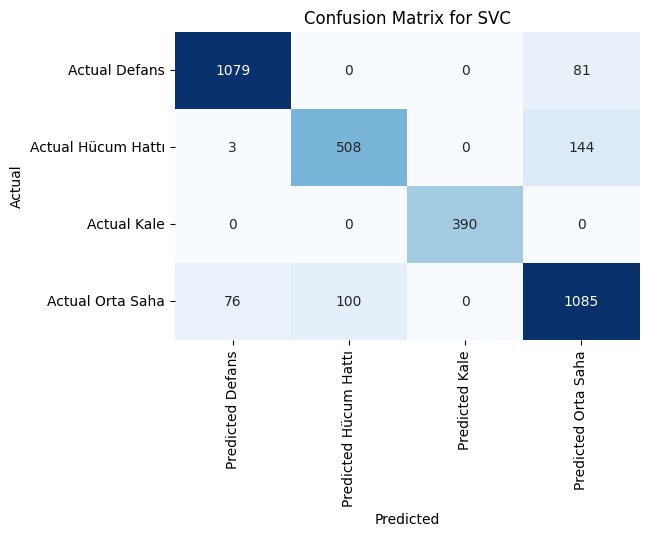

In [26]:

cm_l2 = confusion_matrix(y_test, y_pred_l2)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_l2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Defans", "Predicted Hücum Hattı", "Predicted Kale", "Predicted Orta Saha"],
            yticklabels=["Actual Defans", "Actual Hücum Hattı", "Actual Kale", "Actual Orta Saha"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVC")
plt.show()

In [27]:
X_train

,Positioning,Acceleration,Sprint Speed,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Shot Passing,Long Passing,Curve,Agility,Balance,Reactions,Ball Control,Detailed Dribbling,Composure,Interception,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Age,Att_Work_Rate,Def_Work_Rate,Foot
12010,46,41,31,27,62,63,47,39,66,58,55,74,71,49,77,81,58,63,54,54,61,37,64,55,63,42,74,58,56,38,0,2,1
13251,40,61,63,36,52,40,38,43,49,45,39,70,63,42,59,69,57,59,52,48,53,58,51,66,63,61,63,56,70,23,1,2,1
16564,39,66,68,41,49,42,39,47,50,52,38,55,54,36,66,72,44,54,51,53,53,42,46,54,45,53,63,64,75,27,0,2,1
326,37,75,79,38,75,48,42,40,65,55,59,82,80,54,66,67,82,75,71,78,82,79,83,85,82,87,71,80,77,28,1,1,1
11195,42,81,71,24,32,28,32,40,58,64,26,64,62,39,68,72,55,59,61,52,62,33,57,59,56,51,65,48,67,20,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,54,84,81,43,57,38,27,38,48,65,34,62,51,62,67,73,54,56,65,49,52,58,51,63,60,75,68,62,62,19,2,1,0
11964,47,66,69,42,56,48,45,45,55,54,50,65,58,56,58,43,61,64,62,53,58,64,56,63,57,74,83,74,57,25,2,1,1
5390,68,75,73,69,51,58,57,61,70,63,51,72,65,58,76,75,65,73,71,63,45,57,47,44,45,67,61,58,48,23,1,1,1
860,52,79,78,46,57,60,55,44,57,76,55,77,70,72,70,60,78,79,73,70,77,71,78,74,79,82,80,71,57,28,2,2,1


In [29]:
import shap

  0%|          | 0/100 [00:00<?, ?it/s]

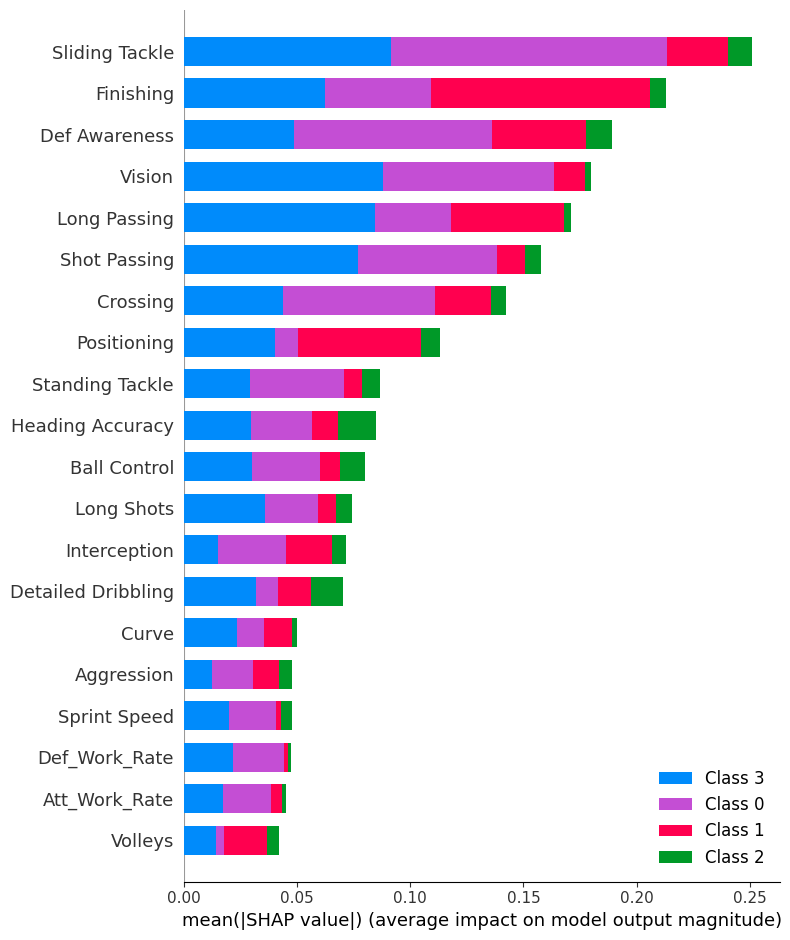

In [30]:
# Assuming model_l2 is a trained Logistic Regression model
explainer = shap.KernelExplainer(model_l2.predict_proba, X_train_scaled[:100, :])  # Adjust the sample size as needed

# Obtain SHAP values for the test set
shap_values_classification = explainer.shap_values(X_test_scaled[:100, :])  # Adjust the sample size as needed

# Summary plot
shap.summary_plot(shap_values_classification, X_test_scaled[:100, :], feature_names=X_test.columns)  # Adjust the sample size as needed

In [31]:
import pickle
pickle.dump(model_l2,open("logreg_l2_model.pkl","wb"))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you have already defined X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Normal Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

strafied_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Cross-validation scores
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=strafied_kfold, scoring='accuracy')  # You can adjust cv as needed
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {cv_scores.mean()}')

# L2 (Ridge) Logistic Regression model
model_l2 = LogisticRegression(penalty='l2', C=0.1, random_state=42, max_iter=1000)

# Cross-validation scores for L2 regularization
cv_scores_l2 = cross_val_score(model_l2, X_train_scaled, y_train, cv=strafied_kfold, scoring='accuracy')
print(f'Cross-validation scores (L2): {cv_scores_l2}')
print(f'Mean CV accuracy (L2): {cv_scores_l2.mean()}')


Cross-validation scores: [0.88852814 0.8961039  0.89213564 0.88744589 0.88492063]
Mean CV accuracy: 0.8898268398268397
Cross-validation scores (L2): [0.88708514 0.8953824  0.89285714 0.88492063 0.88419913]
Mean CV accuracy (L2): 0.888888888888889


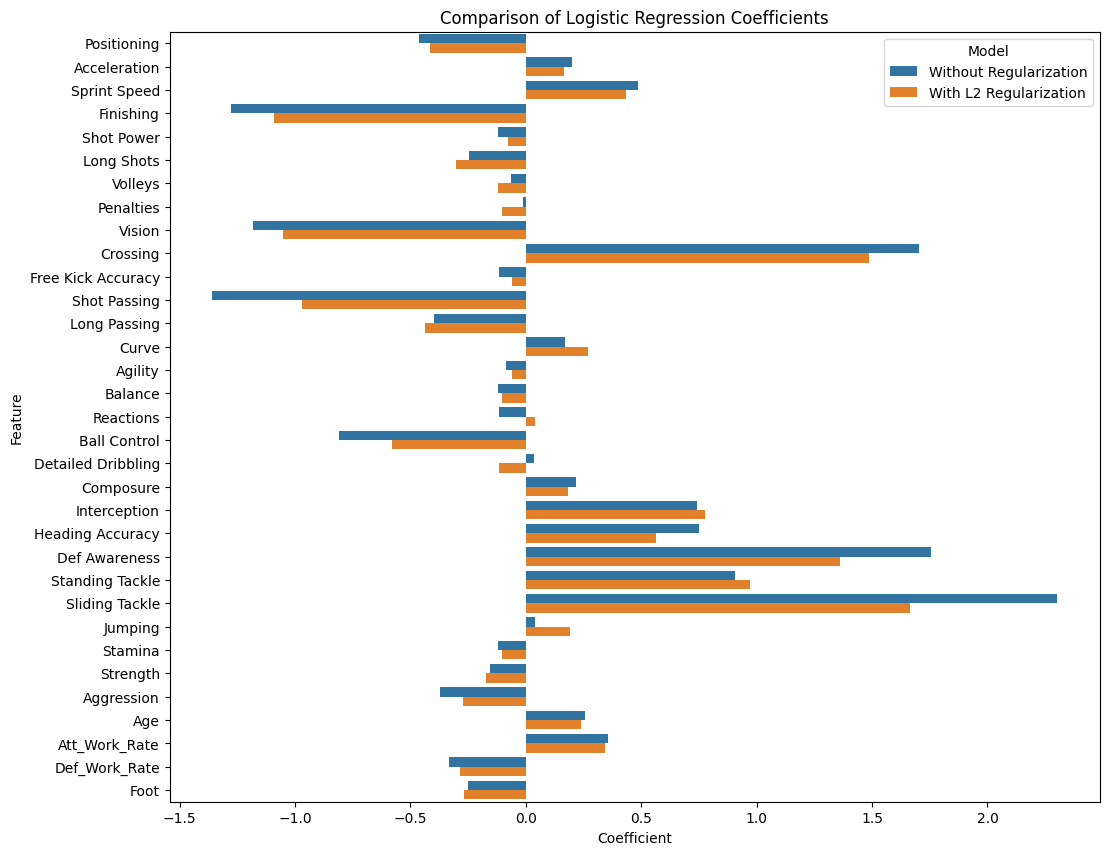

In [ ]:
coef_df['Model'] = 'Without Regularization'
coef_df_l2['Model'] = 'With L2 Regularization'
combined_coef_df = pd.concat([coef_df, coef_df_l2], ignore_index=True)

# Katsayıları görselleştir
plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Feature', hue='Model', data=combined_coef_df)
plt.title('Comparison of Logistic Regression Coefficients')
plt.show()

In [ ]:
# 'Defans': ['CB', 'LB', 'RB', 'LWB', 'RWB'],     = 0
# 'Hücum Hattı': ['CF', 'ST', 'LW', 'RW'],        = 1
# 'Kale': ['GK']                                  = 2
# 'Orta Saha': ['CAM', 'CDM', 'CM', 'LM', 'RM'],  = 3

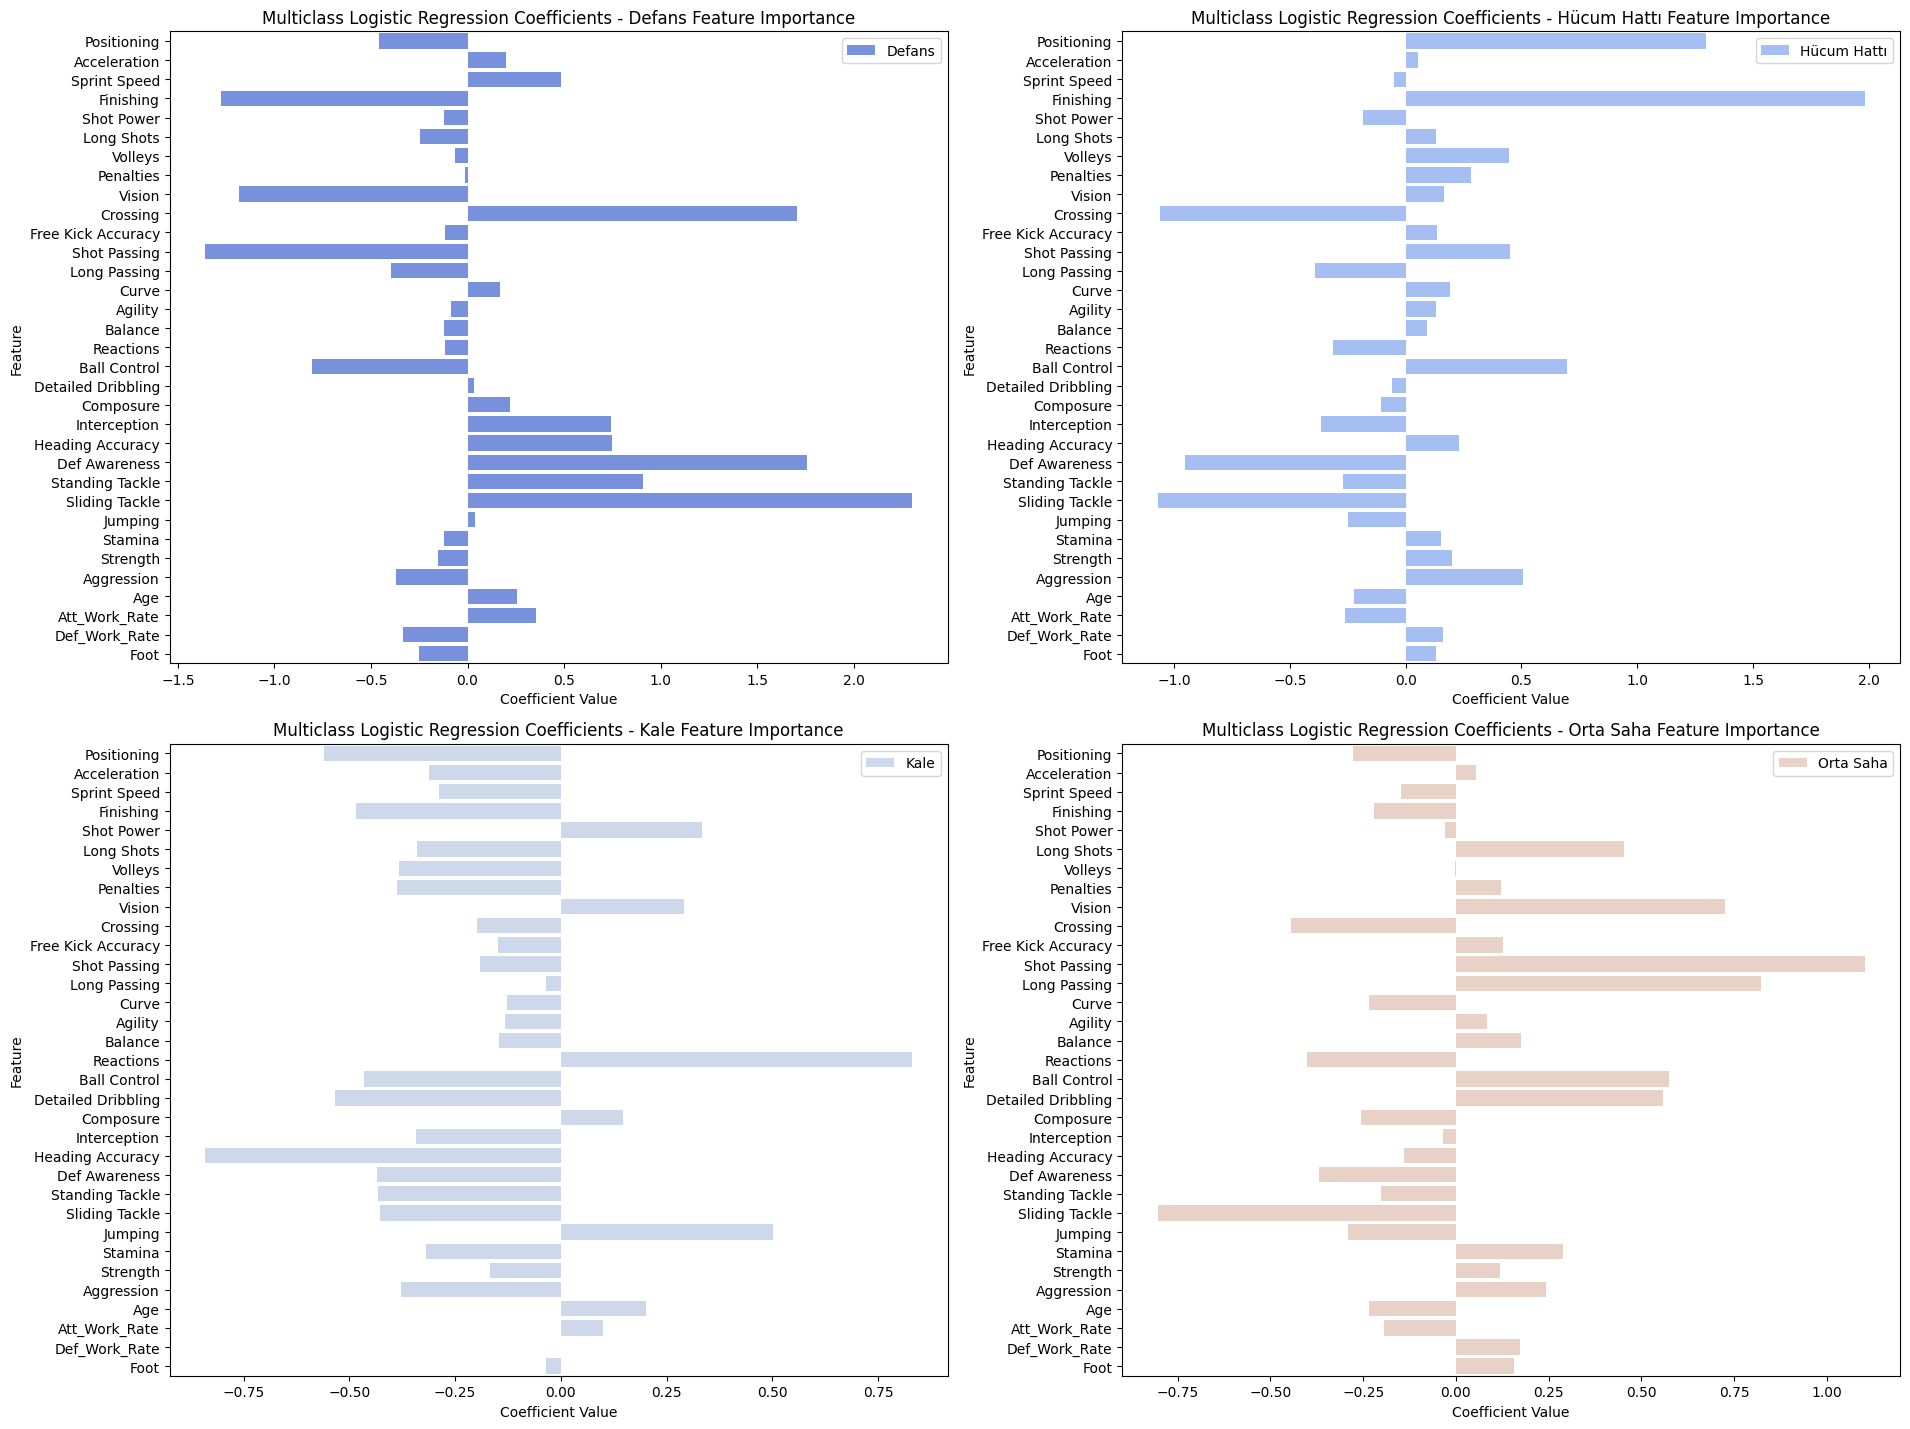

In [34]:
# Özellik katsayılarına ve isimlerine erişim
coefficients = model_l2.coef_
feature_names = X_train.columns

# Katsayıları ve özellik isimlerini bir DataFrame'e yerleştir
importances_df = pd.DataFrame({'Feature': feature_names, 'Defans': coefficients[0], 'Hücum Hattı': coefficients[1], 'Kale': coefficients[2], 'Orta Saha' : coefficients[3]})
 
# Dimension the chart
scale_factor = 3
fig = plt.gcf()
fig.set_size_inches(fig.get_size_inches() * scale_factor)

# Renk paletini tanımla
colors=sns.color_palette("coolwarm")

# Grafikle göster
plt.subplot(2, 2, 1)
sns.barplot(x='Defans', y='Feature', data=importances_df, color=colors[0], label='Defans')
plt.title('Multiclass Logistic Regression Coefficients - Defans Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend()

# Grafikle göster
plt.subplot(2, 2, 2)
sns.barplot(x='Hücum Hattı', y='Feature', data=importances_df, color=colors[1], label='Hücum Hattı')
plt.title('Multiclass Logistic Regression Coefficients - Hücum Hattı Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend()

# Grafikle göster
plt.subplot(2, 2, 3)
sns.barplot(x='Kale', y='Feature', data=importances_df, color=colors[2], label='Kale')
plt.title('Multiclass Logistic Regression Coefficients - Kale Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend()

# Grafikle göster
plt.subplot(2, 2, 4)
sns.barplot(x='Orta Saha', y='Feature', data=importances_df, color=colors[3], label='Orta Saha')
plt.title('Multiclass Logistic Regression Coefficients - Orta Saha Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend()

# Alt çizgeler arasındaki boşluğu düzenle
plt.tight_layout()

# Grafikleri göster
plt.show()

C:\Users\aliyi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2437
[LightGBM] [Info] Number of data points in the train set: 13860, number of used features: 33
[LightGBM] [Info] Start training from score -1.080169
[LightGBM] [Info] Start training from score -1.676963
[LightGBM] [Info] Start training from score -2.183040
[LightGBM] [Info] Start training from score -1.019369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\aliyi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


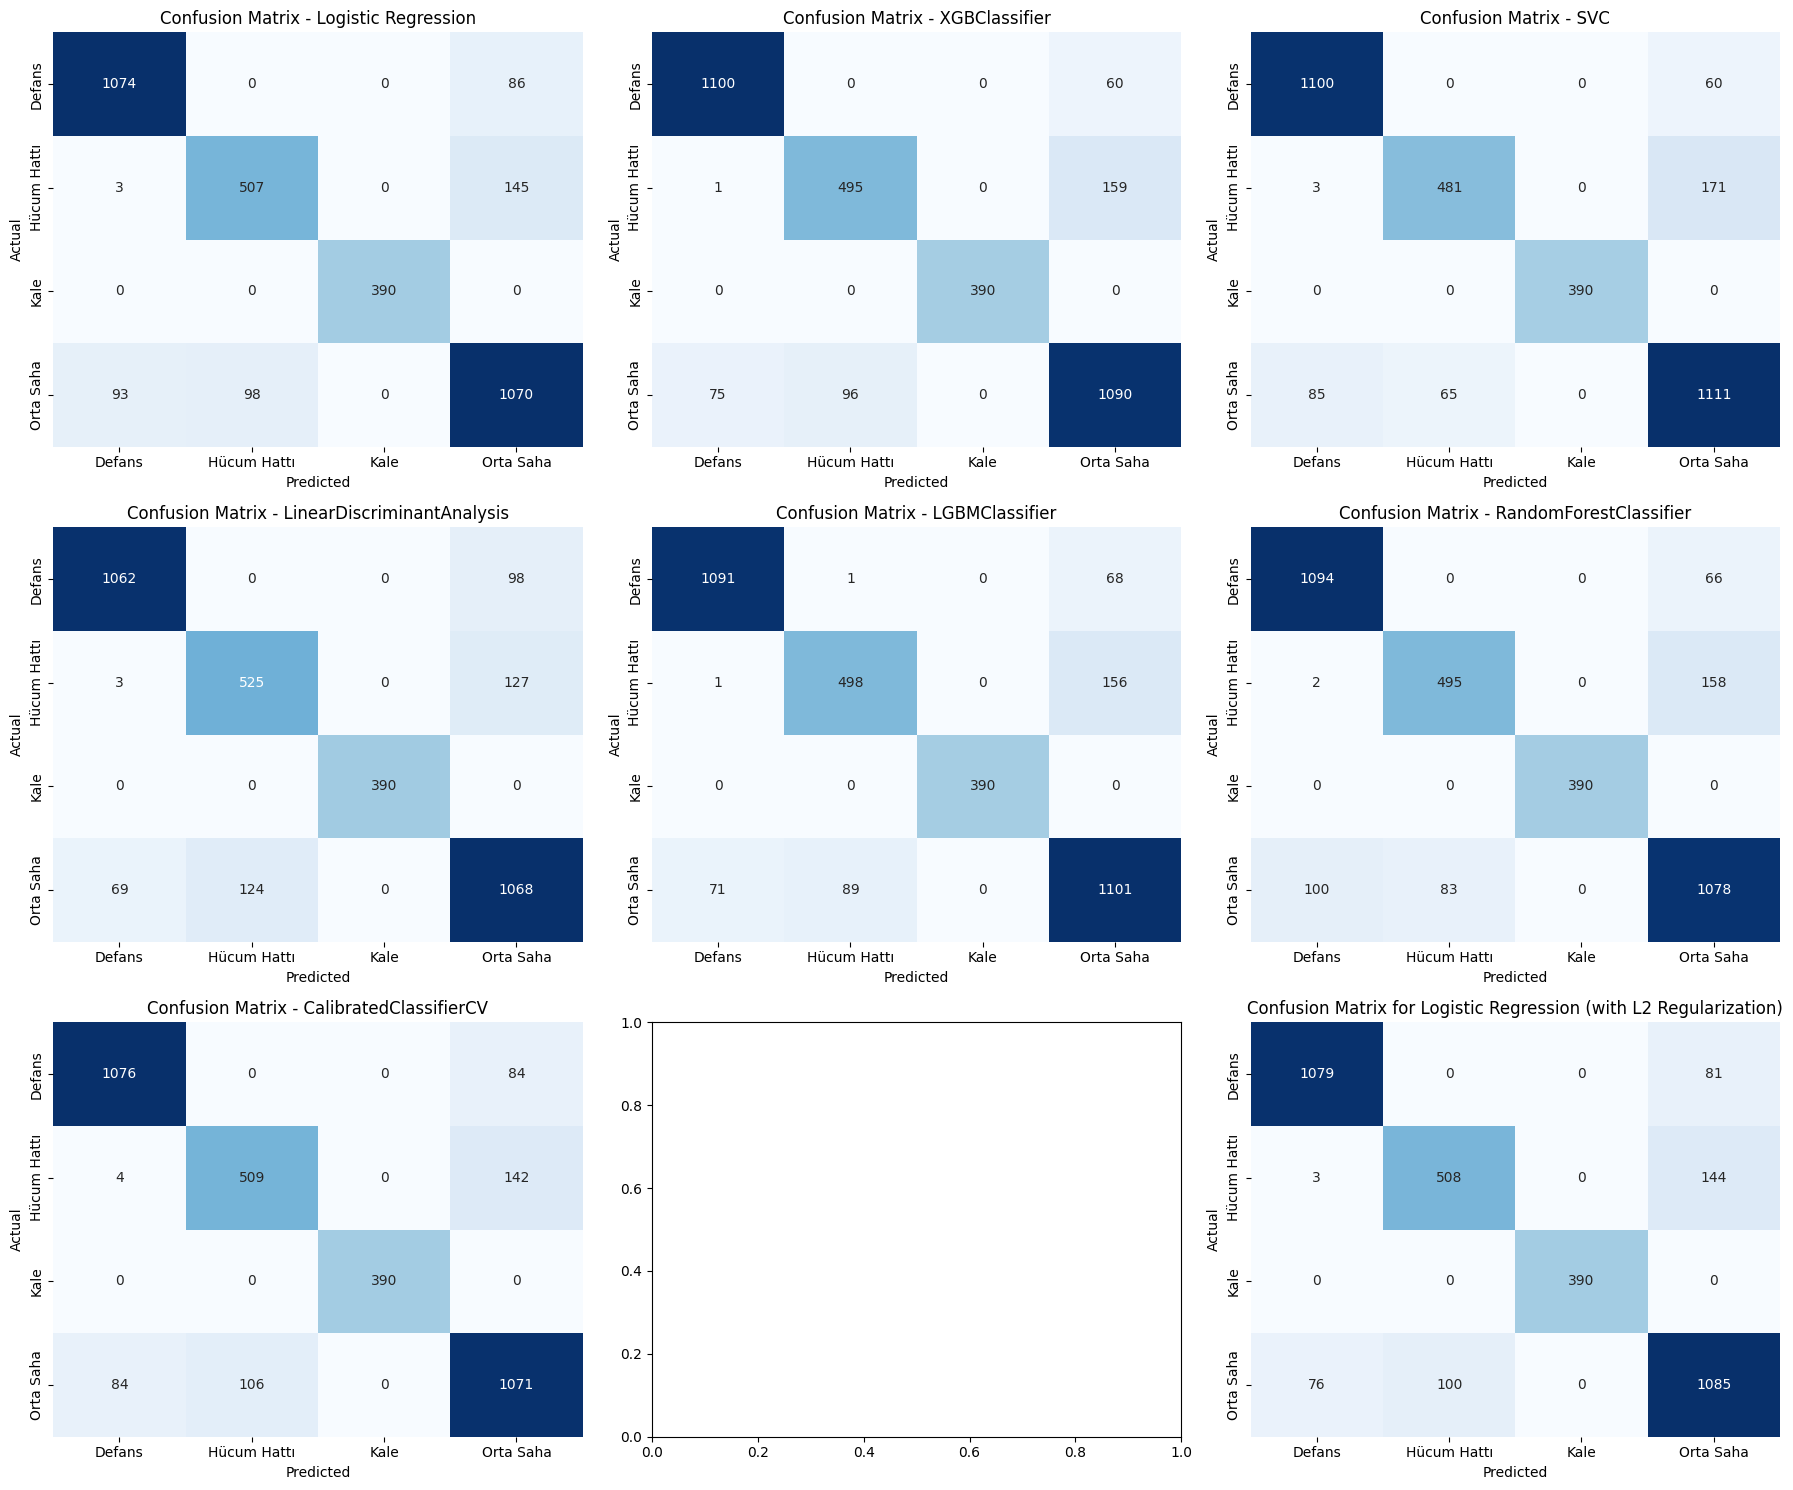

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi oluşturun (bu kısmı verinizle değiştirmeniz gerekiyor)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sınıf isimleri
class_names = ['Defans', 'Hücum Hattı', 'Kale', 'Orta Saha']

# Modelleri oluşturun ve eğitin
models = {
    "Logistic Regression": LogisticRegression(),
    "XGBClassifier": XGBClassifier(),
    "SVC": SVC(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "LGBMClassifier": LGBMClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "CalibratedClassifierCV": CalibratedClassifierCV()
}

confusion_matrices = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

# L2 (Ridge) Logistic Regression modelini oluştur ve eğit
model_l2 = LogisticRegression(penalty='l2', random_state=42)
model_l2.fit(X_train_scaled, y_train)

# Test verisi üzerinde tahminler yap
y_pred_l2 = model_l2.predict(X_test_scaled)

# Confusion matrix oluştur
cm_l2 = confusion_matrix(y_test, y_pred_l2)

# Matrisleri görselleştirme
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Diğer modellerin confusion matrix'leri
for (model_name, cm), ax in zip(confusion_matrices.items(), axes.flatten()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_title(f"Confusion Matrix - {model_name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# L2 (Ridge) Logistic Regression confusion matrix'i
plt.subplot(3, 3, 9)
sns.heatmap(cm_l2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression (with L2 Regularization)")

plt.tight_layout()
plt.show()


C:\Users\aliyi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


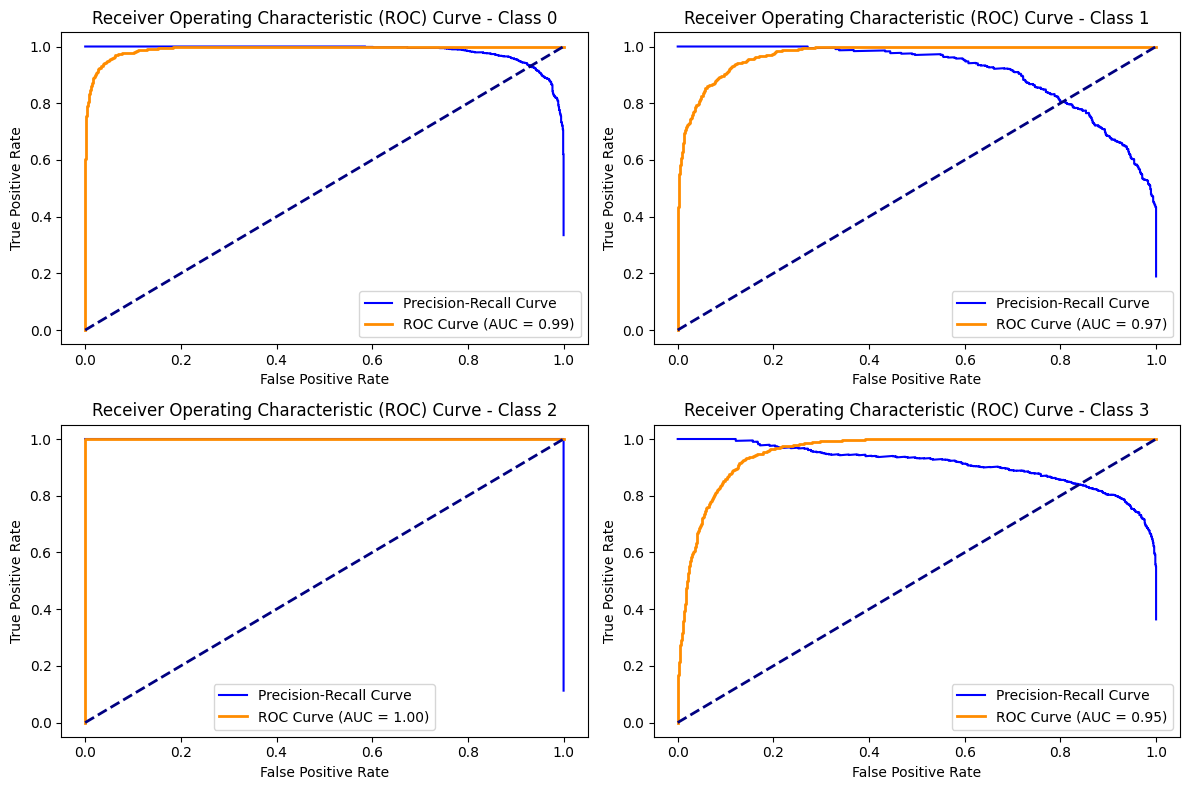

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Veriyi oluşturun (bu kısmı verinizle değiştirmeniz gerekiyor)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L2 (Ridge) Logistic Regression modelini oluştur ve eğit
model_l2 = LogisticRegression(penalty='l2', random_state=42)
model_l2.fit(X_train_scaled, y_train)

# Test verisi üzerinde tahminler yap
y_probs_l2 = model_l2.predict_proba(X_test_scaled)

# class_names'ı tanımla (sınıf isimlerinizi veri setinizin sınıf isimleriyle değiştirin)
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Her bir sınıf için precision-recall ve ROC eğrilerini çiz
plt.figure(figsize=(12, 8))

for i in range(len(class_names)):
    # Precision-Recall Eğrisi
    precision, recall, _ = precision_recall_curve(y_test == i, y_probs_l2[:, i])
    plt.subplot(2, 2, i + 1)
    plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {class_names[i]}')
    plt.legend()

    # ROC Eğrisi
    fpr, tpr, _ = roc_curve(y_test == i, y_probs_l2[:, i])
    roc_auc = auc(fpr, tpr)
    plt.subplot(2, 2, i + 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {class_names[i]}')
    plt.legend()

plt.tight_layout()
plt.show()




sns.pairplot(fc24, hue='Kategori');

# EXPLAINABLE AI

In [ ]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Veriyi oluşturun (bu kısmı verinizle değiştirmeniz gerekiyor)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# L2 (Ridge) Logistic Regression modelini oluştur ve eğit
model_l2 = LogisticRegression(penalty='l2', random_state=42)
model_l2.fit(X_train_scaled, y_train)

# shap explainer oluştur
explainer_l2 = shap.Explainer(model_l2, X_train_scaled)

# Test verisi üzerinde SHAP değerlerini hesapla
shap_values_l2 = explainer_l2.shap_values(X_test_scaled)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


# 1. Local Explainability

In [ ]:
shap.initjs()

In [ ]:
X_test.join(y_test)

,Positioning,Acceleration,Sprint Speed,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Shot Passing,Long Passing,Curve,Agility,Balance,Reactions,Ball Control,Detailed Dribbling,Composure,Interception,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Age,Att_Work_Rate,Def_Work_Rate,Foot,Kategori
9910,64,68,67,59,60,51,45,45,62,53,43,70,67,57,66,66,61,67,63,59,51,45,57,60,53,58,79,60,68,27,2,2,1,3
5502,72,90,89,70,59,67,61,68,55,53,49,68,46,56,85,80,71,70,71,69,31,60,33,27,21,80,77,69,57,26,2,1,1,1
13576,49,79,76,37,51,39,35,48,51,56,34,61,59,40,67,73,59,61,64,51,56,51,55,62,55,65,54,56,59,24,2,1,0,0
6848,64,75,77,54,71,69,58,44,63,71,62,69,63,62,72,66,70,70,68,68,63,57,61,64,66,70,73,62,65,24,1,1,1,3
8217,47,55,69,45,56,38,34,45,52,46,33,66,64,37,61,37,56,68,61,55,62,58,61,68,67,74,77,87,68,25,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8377,72,74,73,68,67,62,60,55,53,56,43,60,52,69,67,62,70,64,66,58,16,60,22,22,18,71,55,62,41,22,1,1,1,1
7550,66,72,69,51,68,70,44,44,69,54,45,70,68,66,74,78,68,69,64,69,66,53,64,63,58,66,81,62,68,24,1,1,1,3
2683,7,39,45,8,57,9,6,12,36,13,10,31,29,12,22,29,73,19,17,37,8,11,20,10,9,68,19,79,22,32,1,1,1,2
13533,57,54,56,49,65,55,46,66,57,63,63,59,56,56,67,68,59,56,57,59,58,54,58,60,58,63,77,71,65,36,1,2,0,0


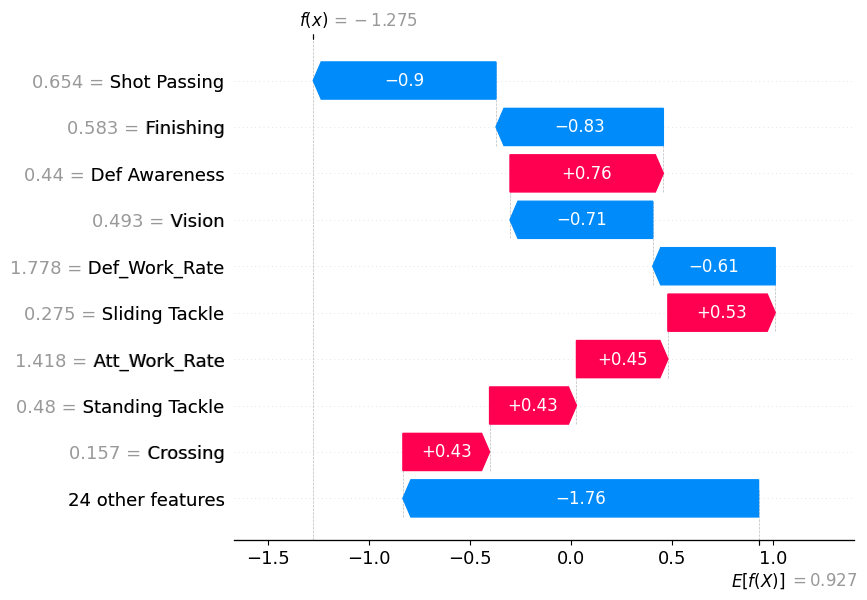

In [ ]:
import shap

# Birinci örnek için SHAP değerlerini al
shap_values_for_first_example = shap_values_l2[0][0]

# shap_values_for_first_example'ı shap.Explanation fonksiyonuna geçir
shap_values_explanation_for_first_example = shap.Explanation(values=shap_values_for_first_example, base_values=explainer_l2.expected_value[0], data=X_test_scaled[0], feature_names=X_train.columns)

# Waterfall plot'u çiz
shap.plots.waterfall(shap_values_explanation_for_first_example)




Error: Index 4 out of range


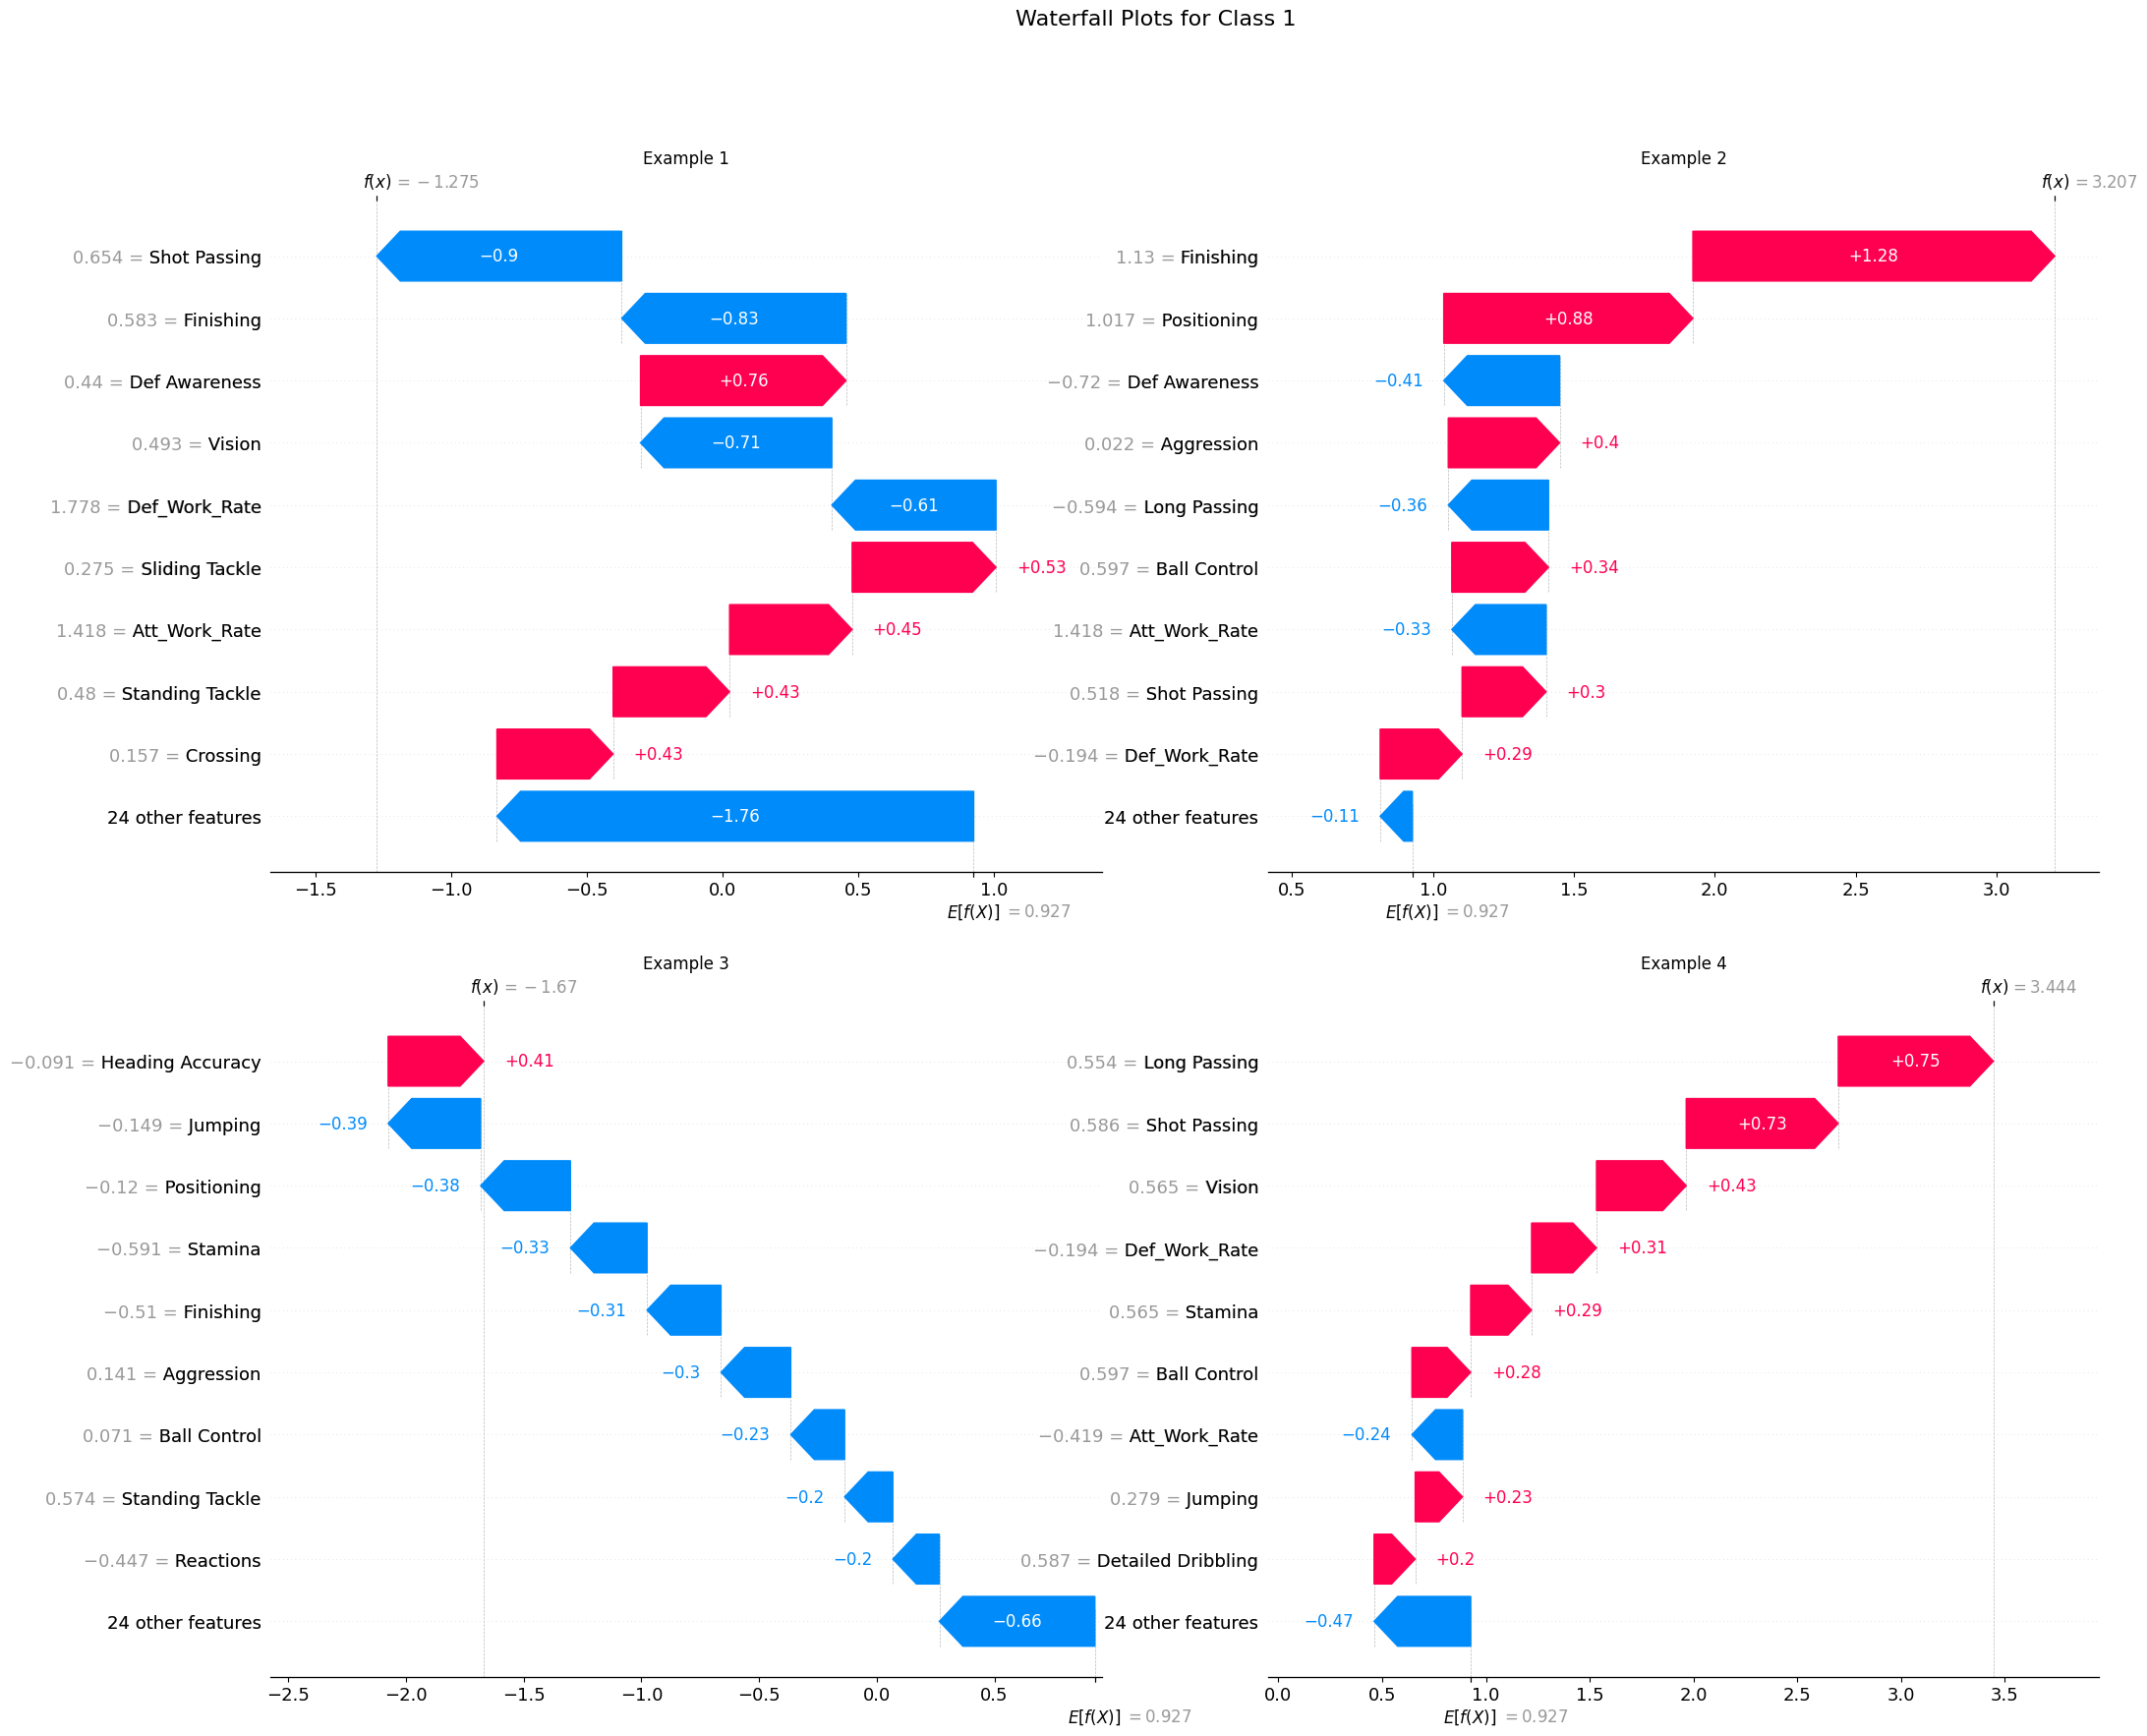

Error: Index 4 out of range


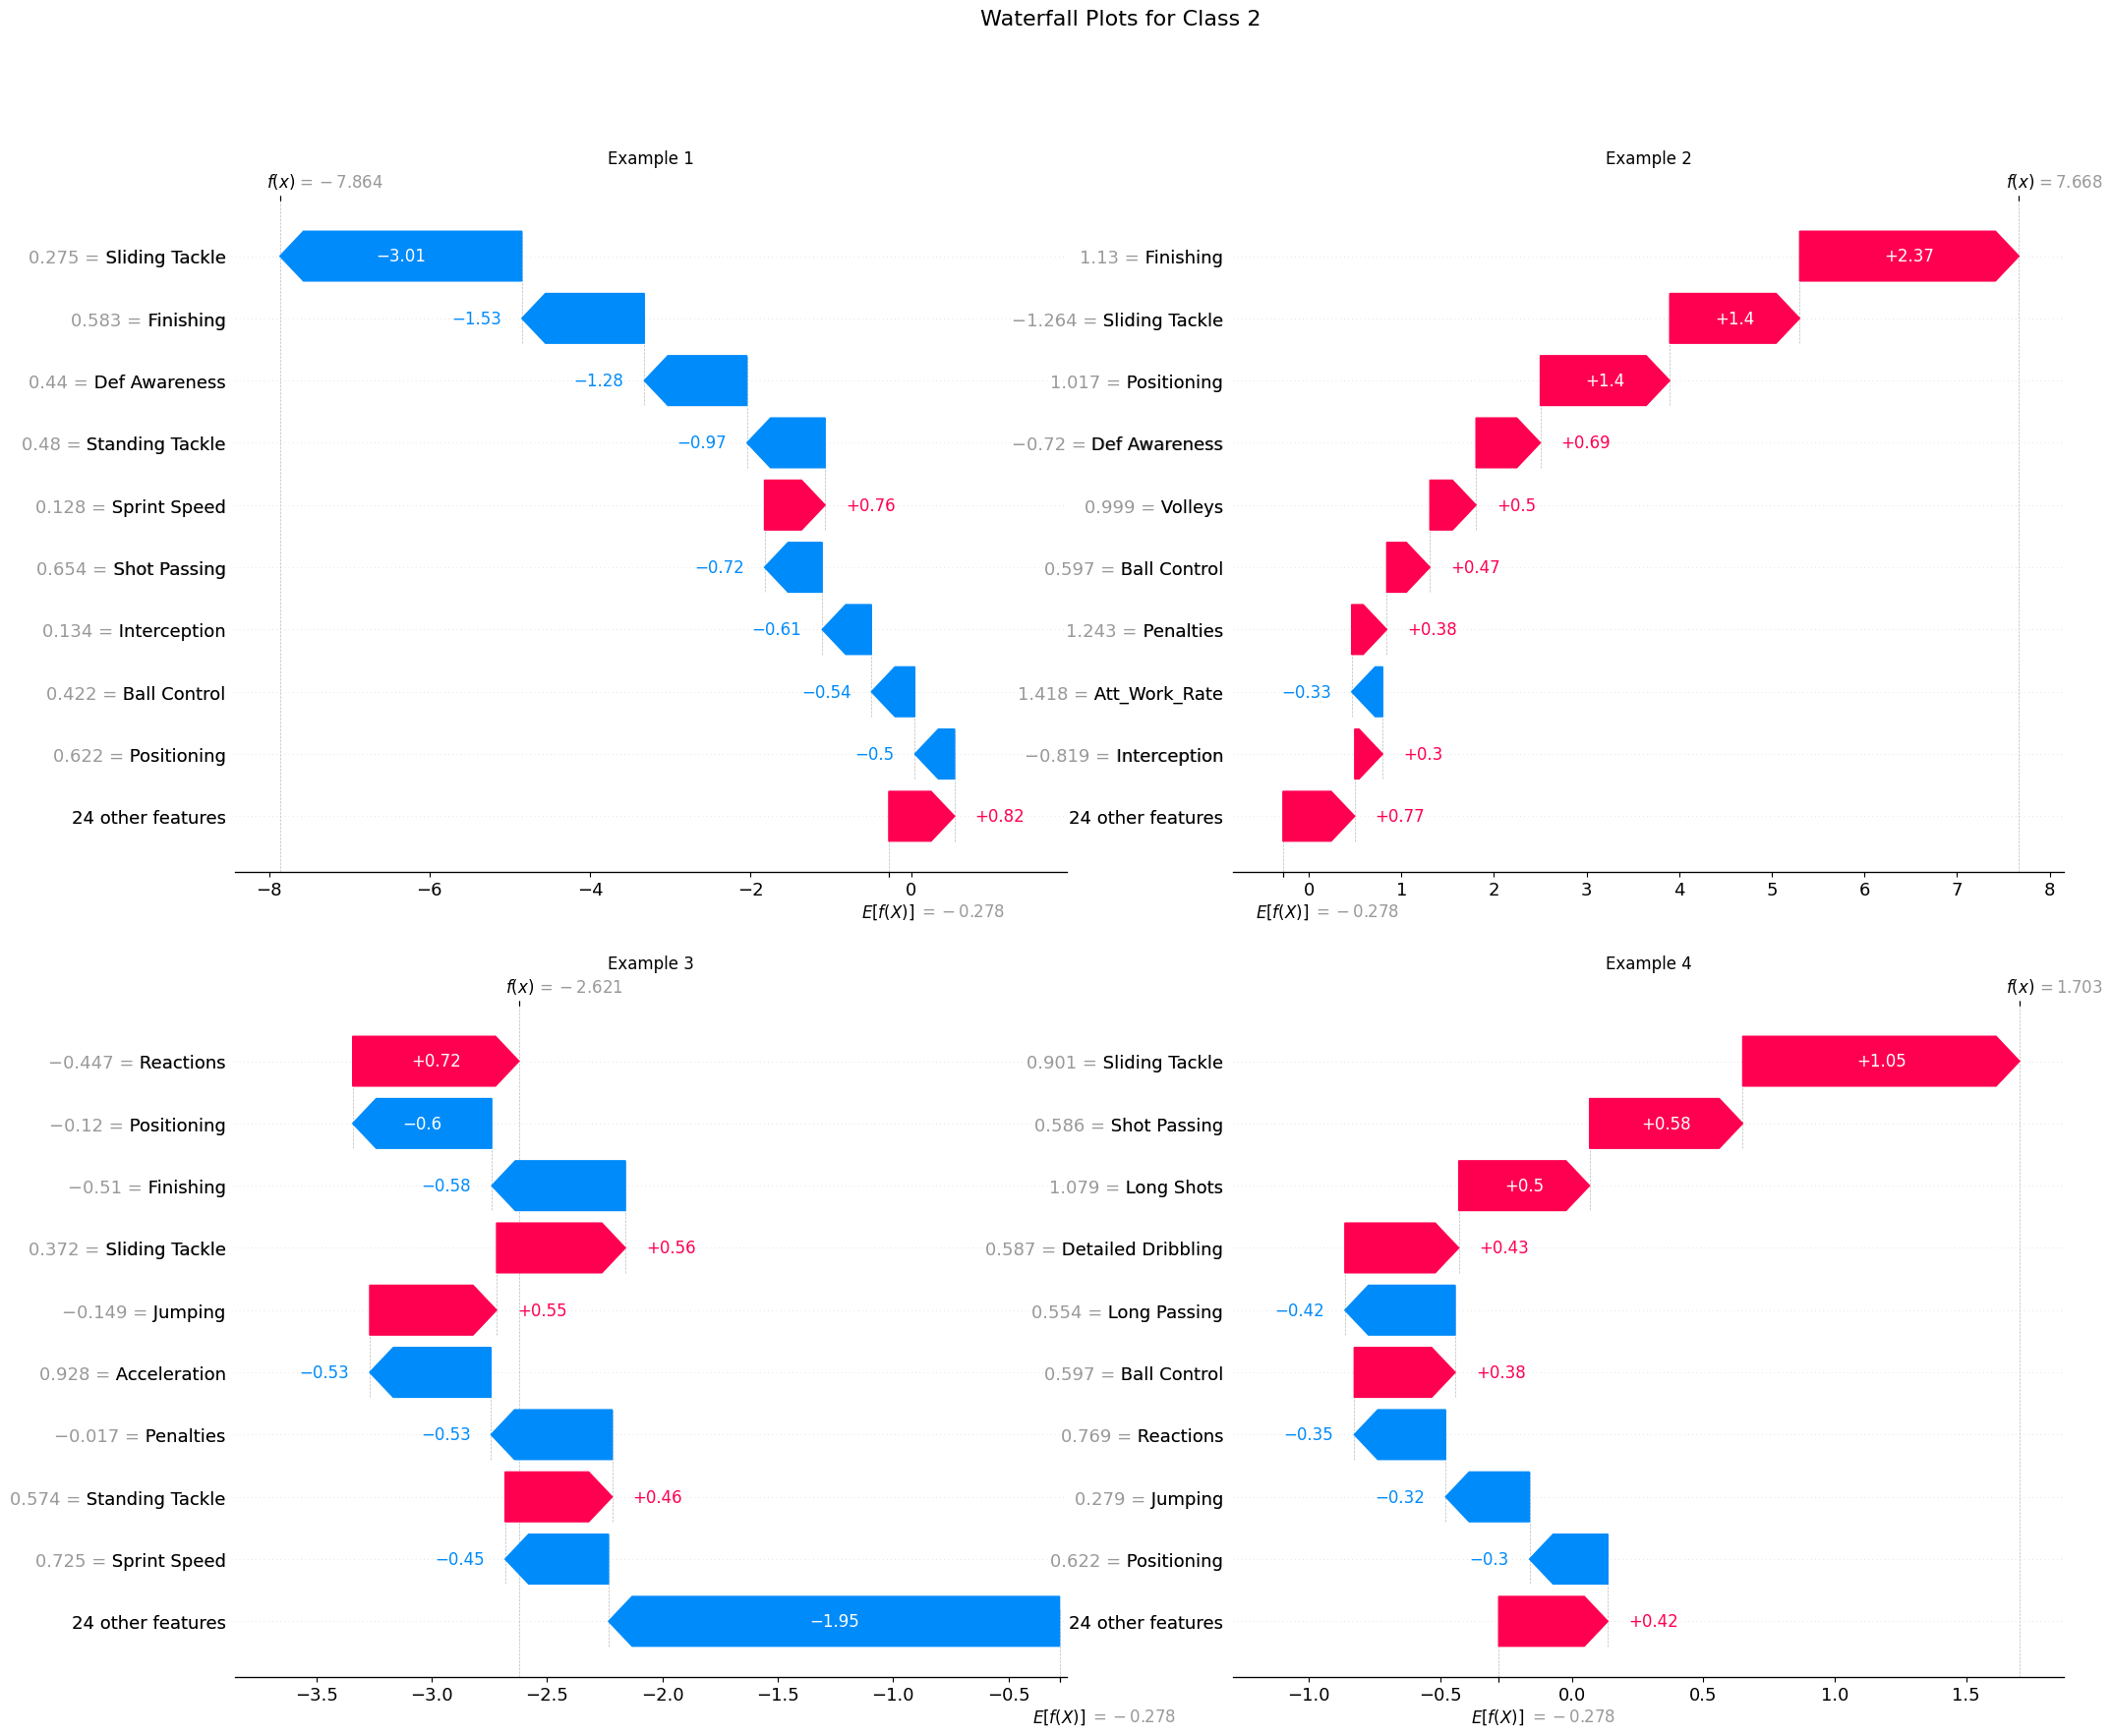

Error: Index 4 out of range


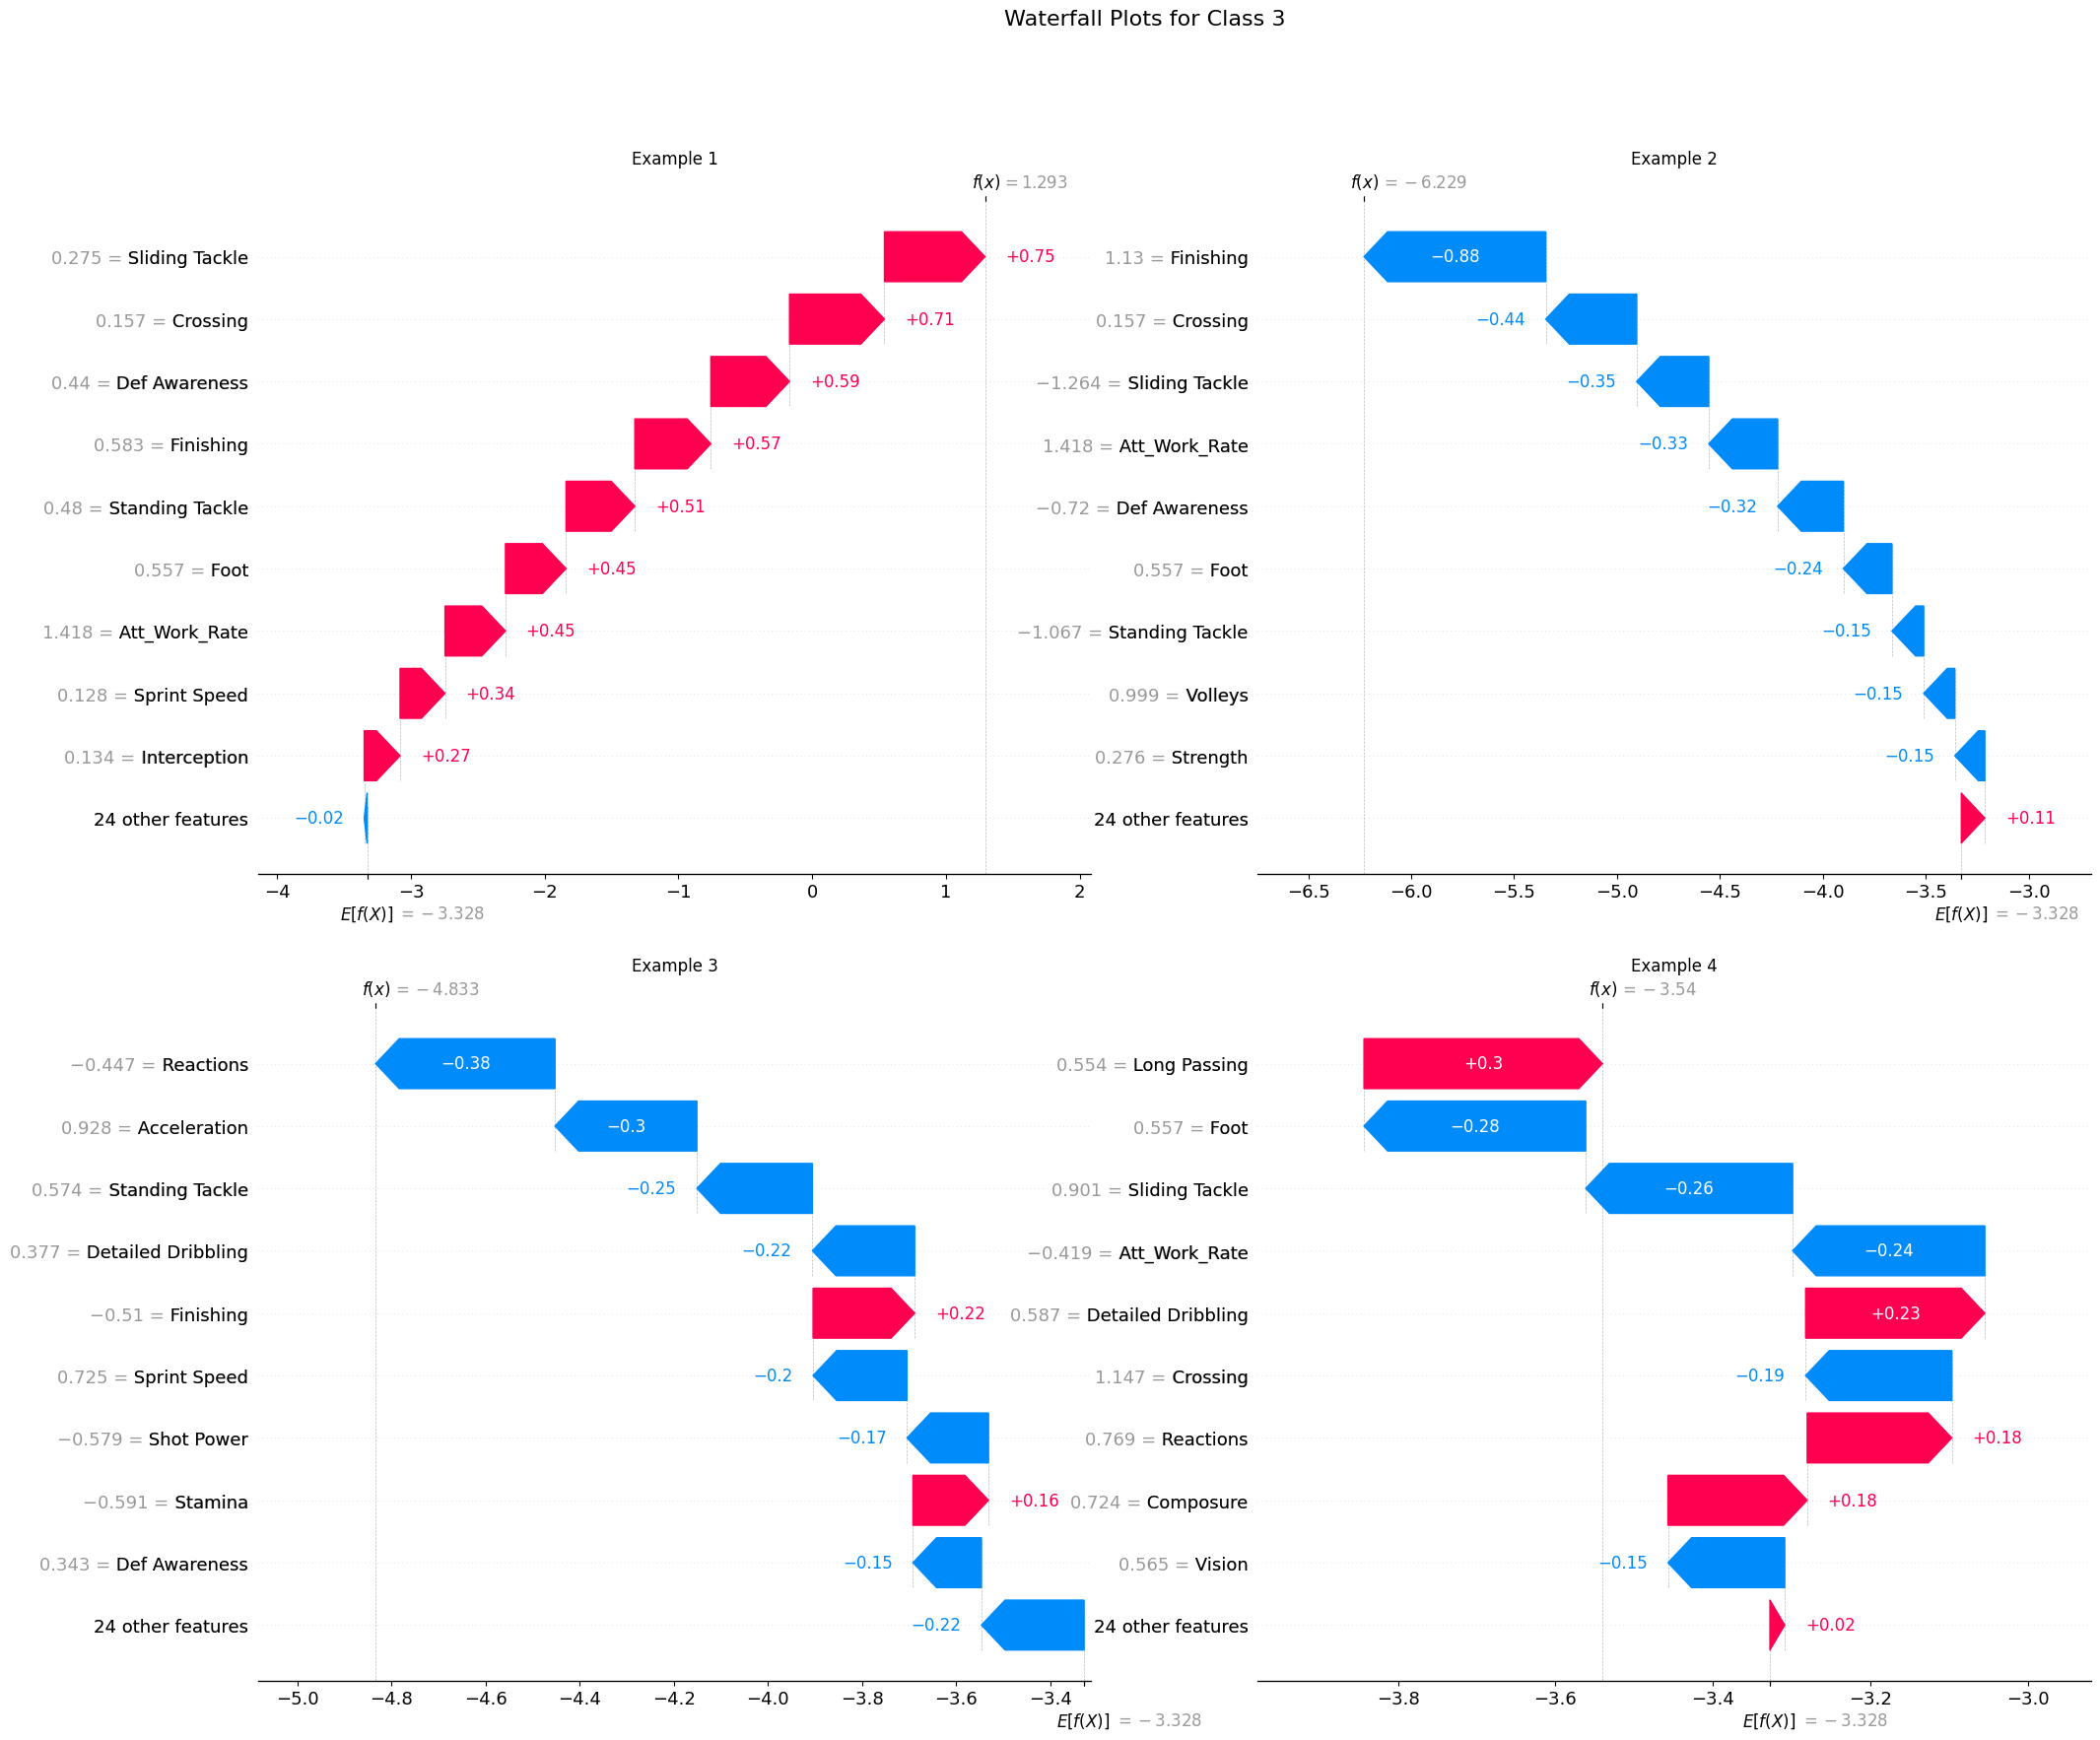

Error: Index 4 out of range


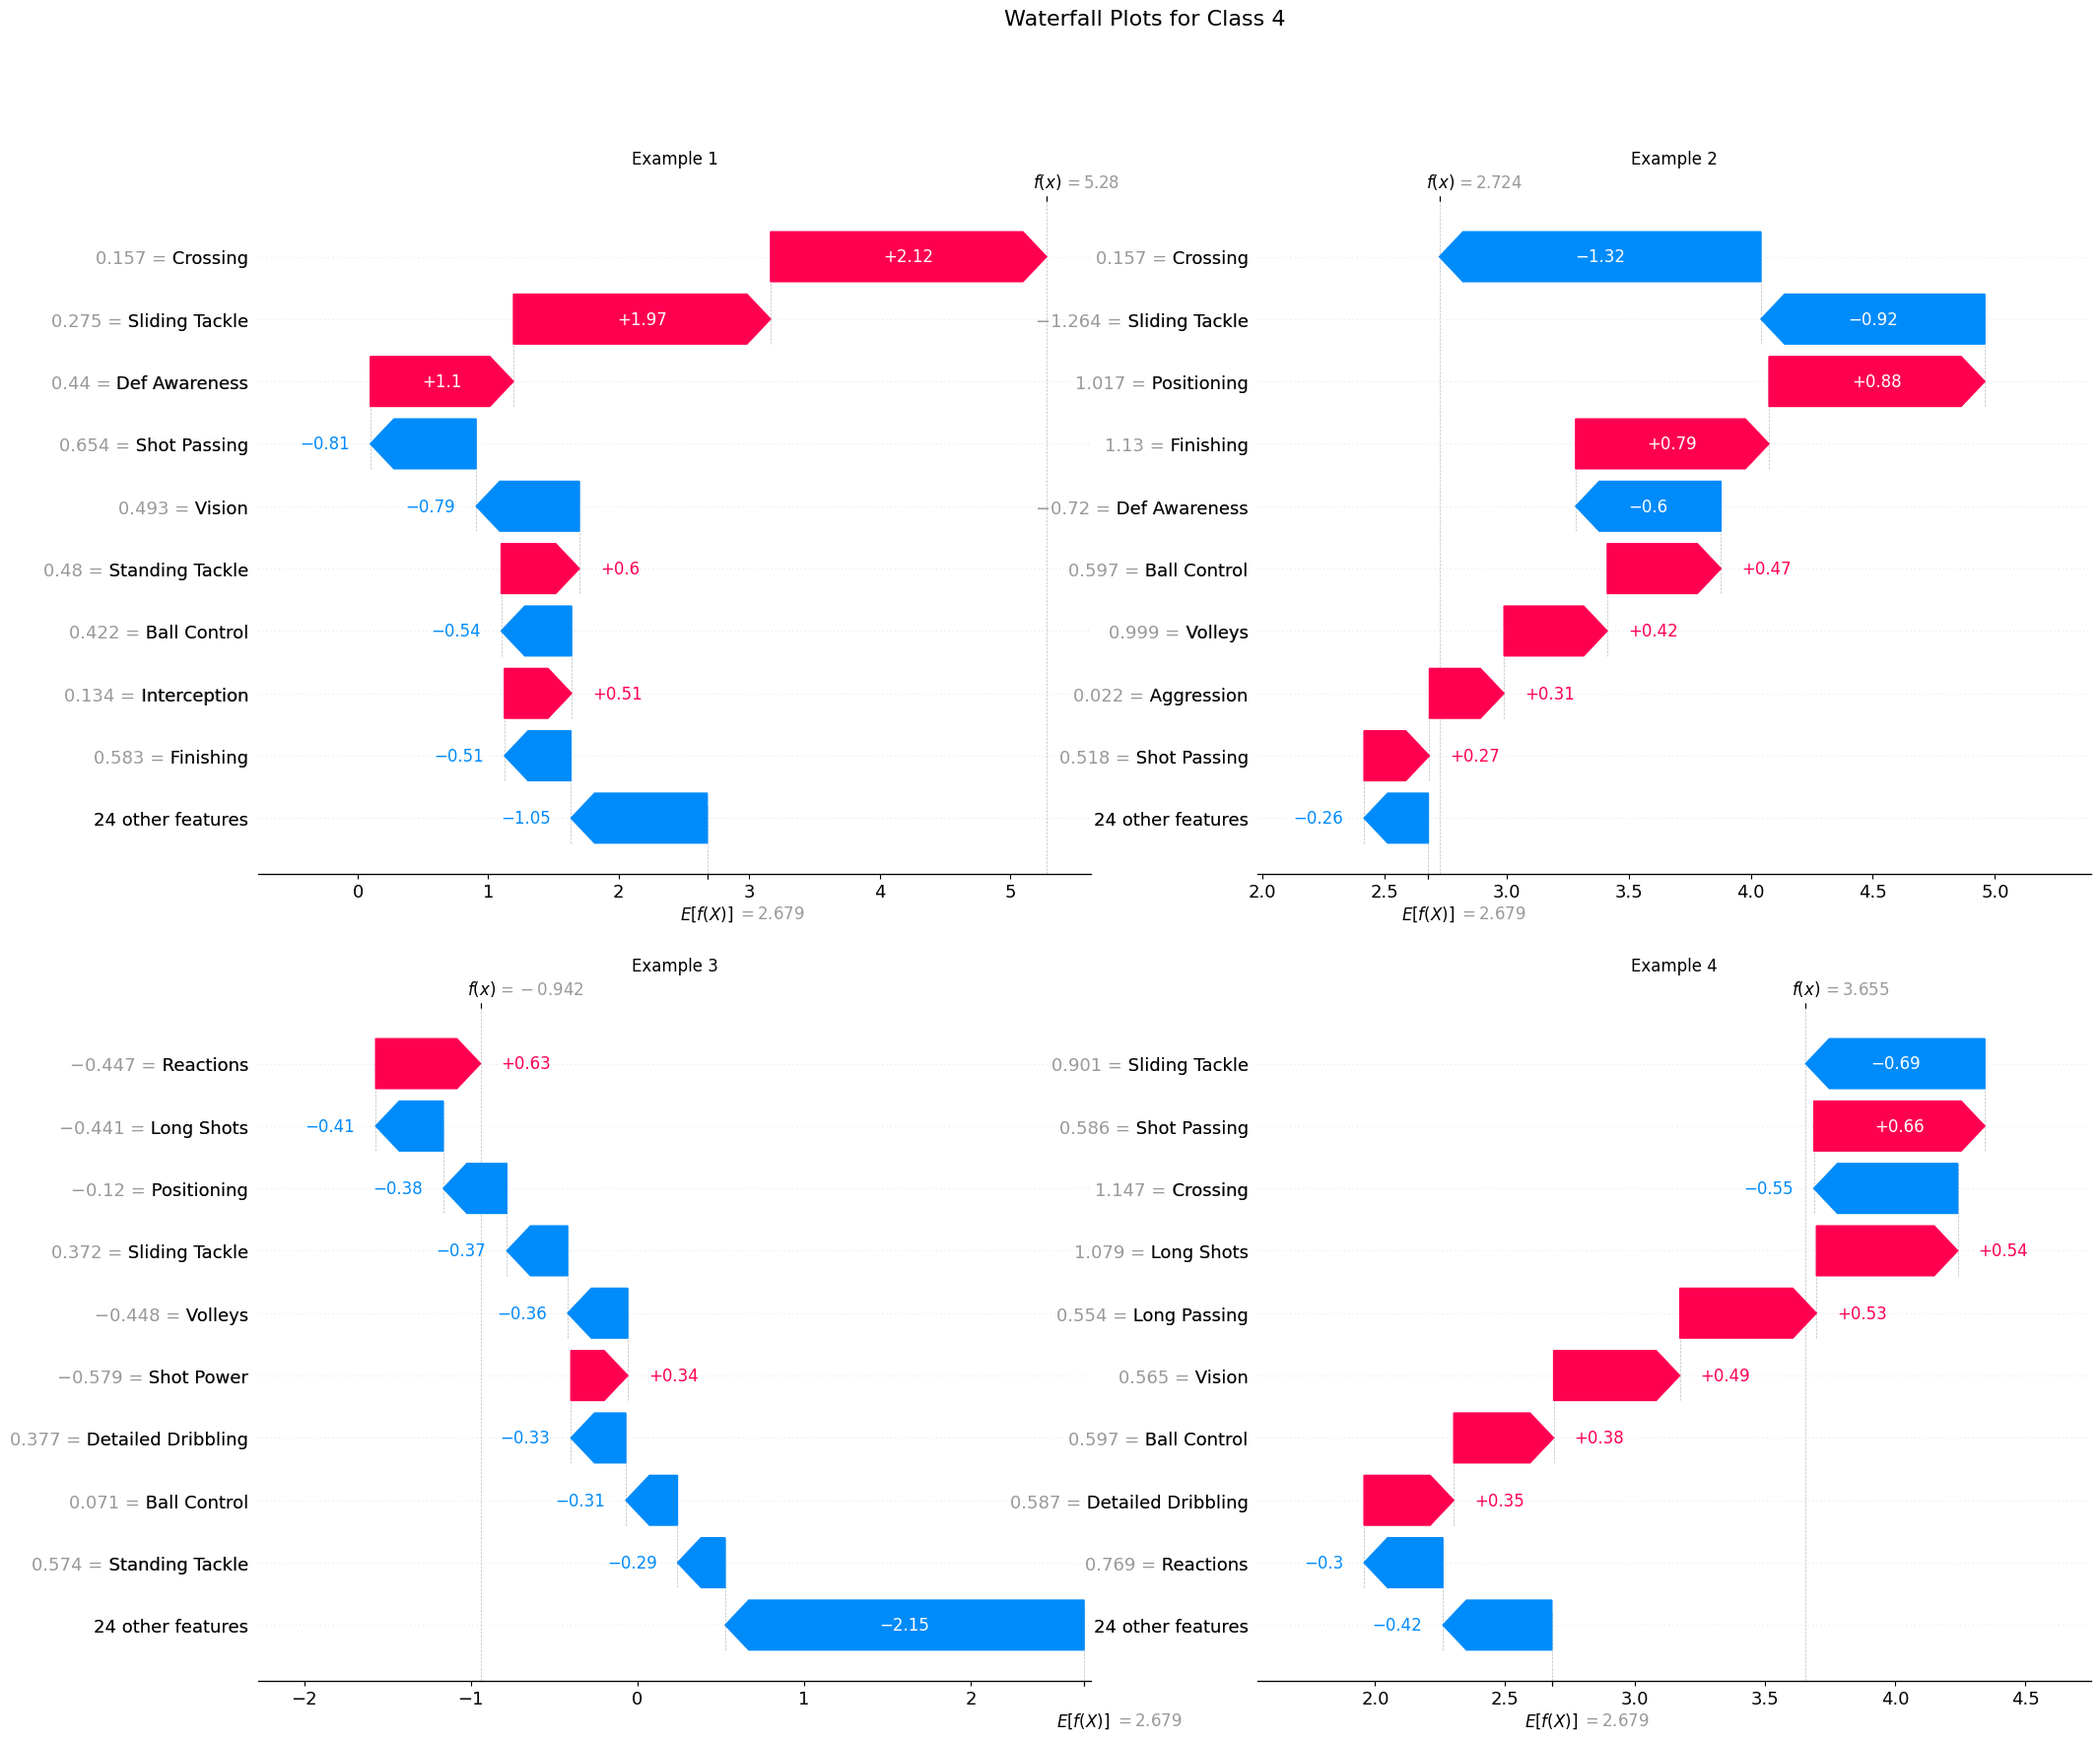

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Tüm veri seti üzerinde SHAP değerlerini hesapla
shap_values_l2 = explainer_l2.shap_values(X_test_scaled)

# Her bir sınıf için ayrı ayrı SHAP değerlerini topla
classwise_shap_values = [np.array([shap_values_l2[i][class_index] for i in range(len(shap_values_l2))]) for class_index in range(len(explainer_l2.expected_value))]

# Her bir sınıf için ayrı ayrı waterfall plot'ları çiz
for class_index in range(len(explainer_l2.expected_value)):
    plt.figure(figsize=(15, 12))
    plt.suptitle(f'Waterfall Plots for Class {class_index + 1}', fontsize=16)

    for i in range(len(X_test_scaled)):
        if i >= len(shap_values_l2):
            print(f"Error: Index {i} out of range")
            break

        shap_values_for_example = shap_values_l2[i][class_index]
        shap_values_explanation = shap.Explanation(
            values=shap_values_for_example,
            base_values=explainer_l2.expected_value[class_index],
            data=X_test_scaled[i],
            feature_names=X_train.columns
        )

        # Subplot oluştur
        plt.subplot(2, 2, i + 1)

        # Waterfall plot'u çiz
        shap.plots.waterfall(shap_values_explanation, show=False)


        # Her bir sınıfın içindeki 4 veri görseli için büyütme
        scale_factor = 3
        subplot_fig = plt.gcf()
        subplot_fig.set_size_inches(subplot_fig.get_size_inches() * scale_factor)

        plt.title(f'Example {i + 1}')

    plt.show()





# GLOBAL

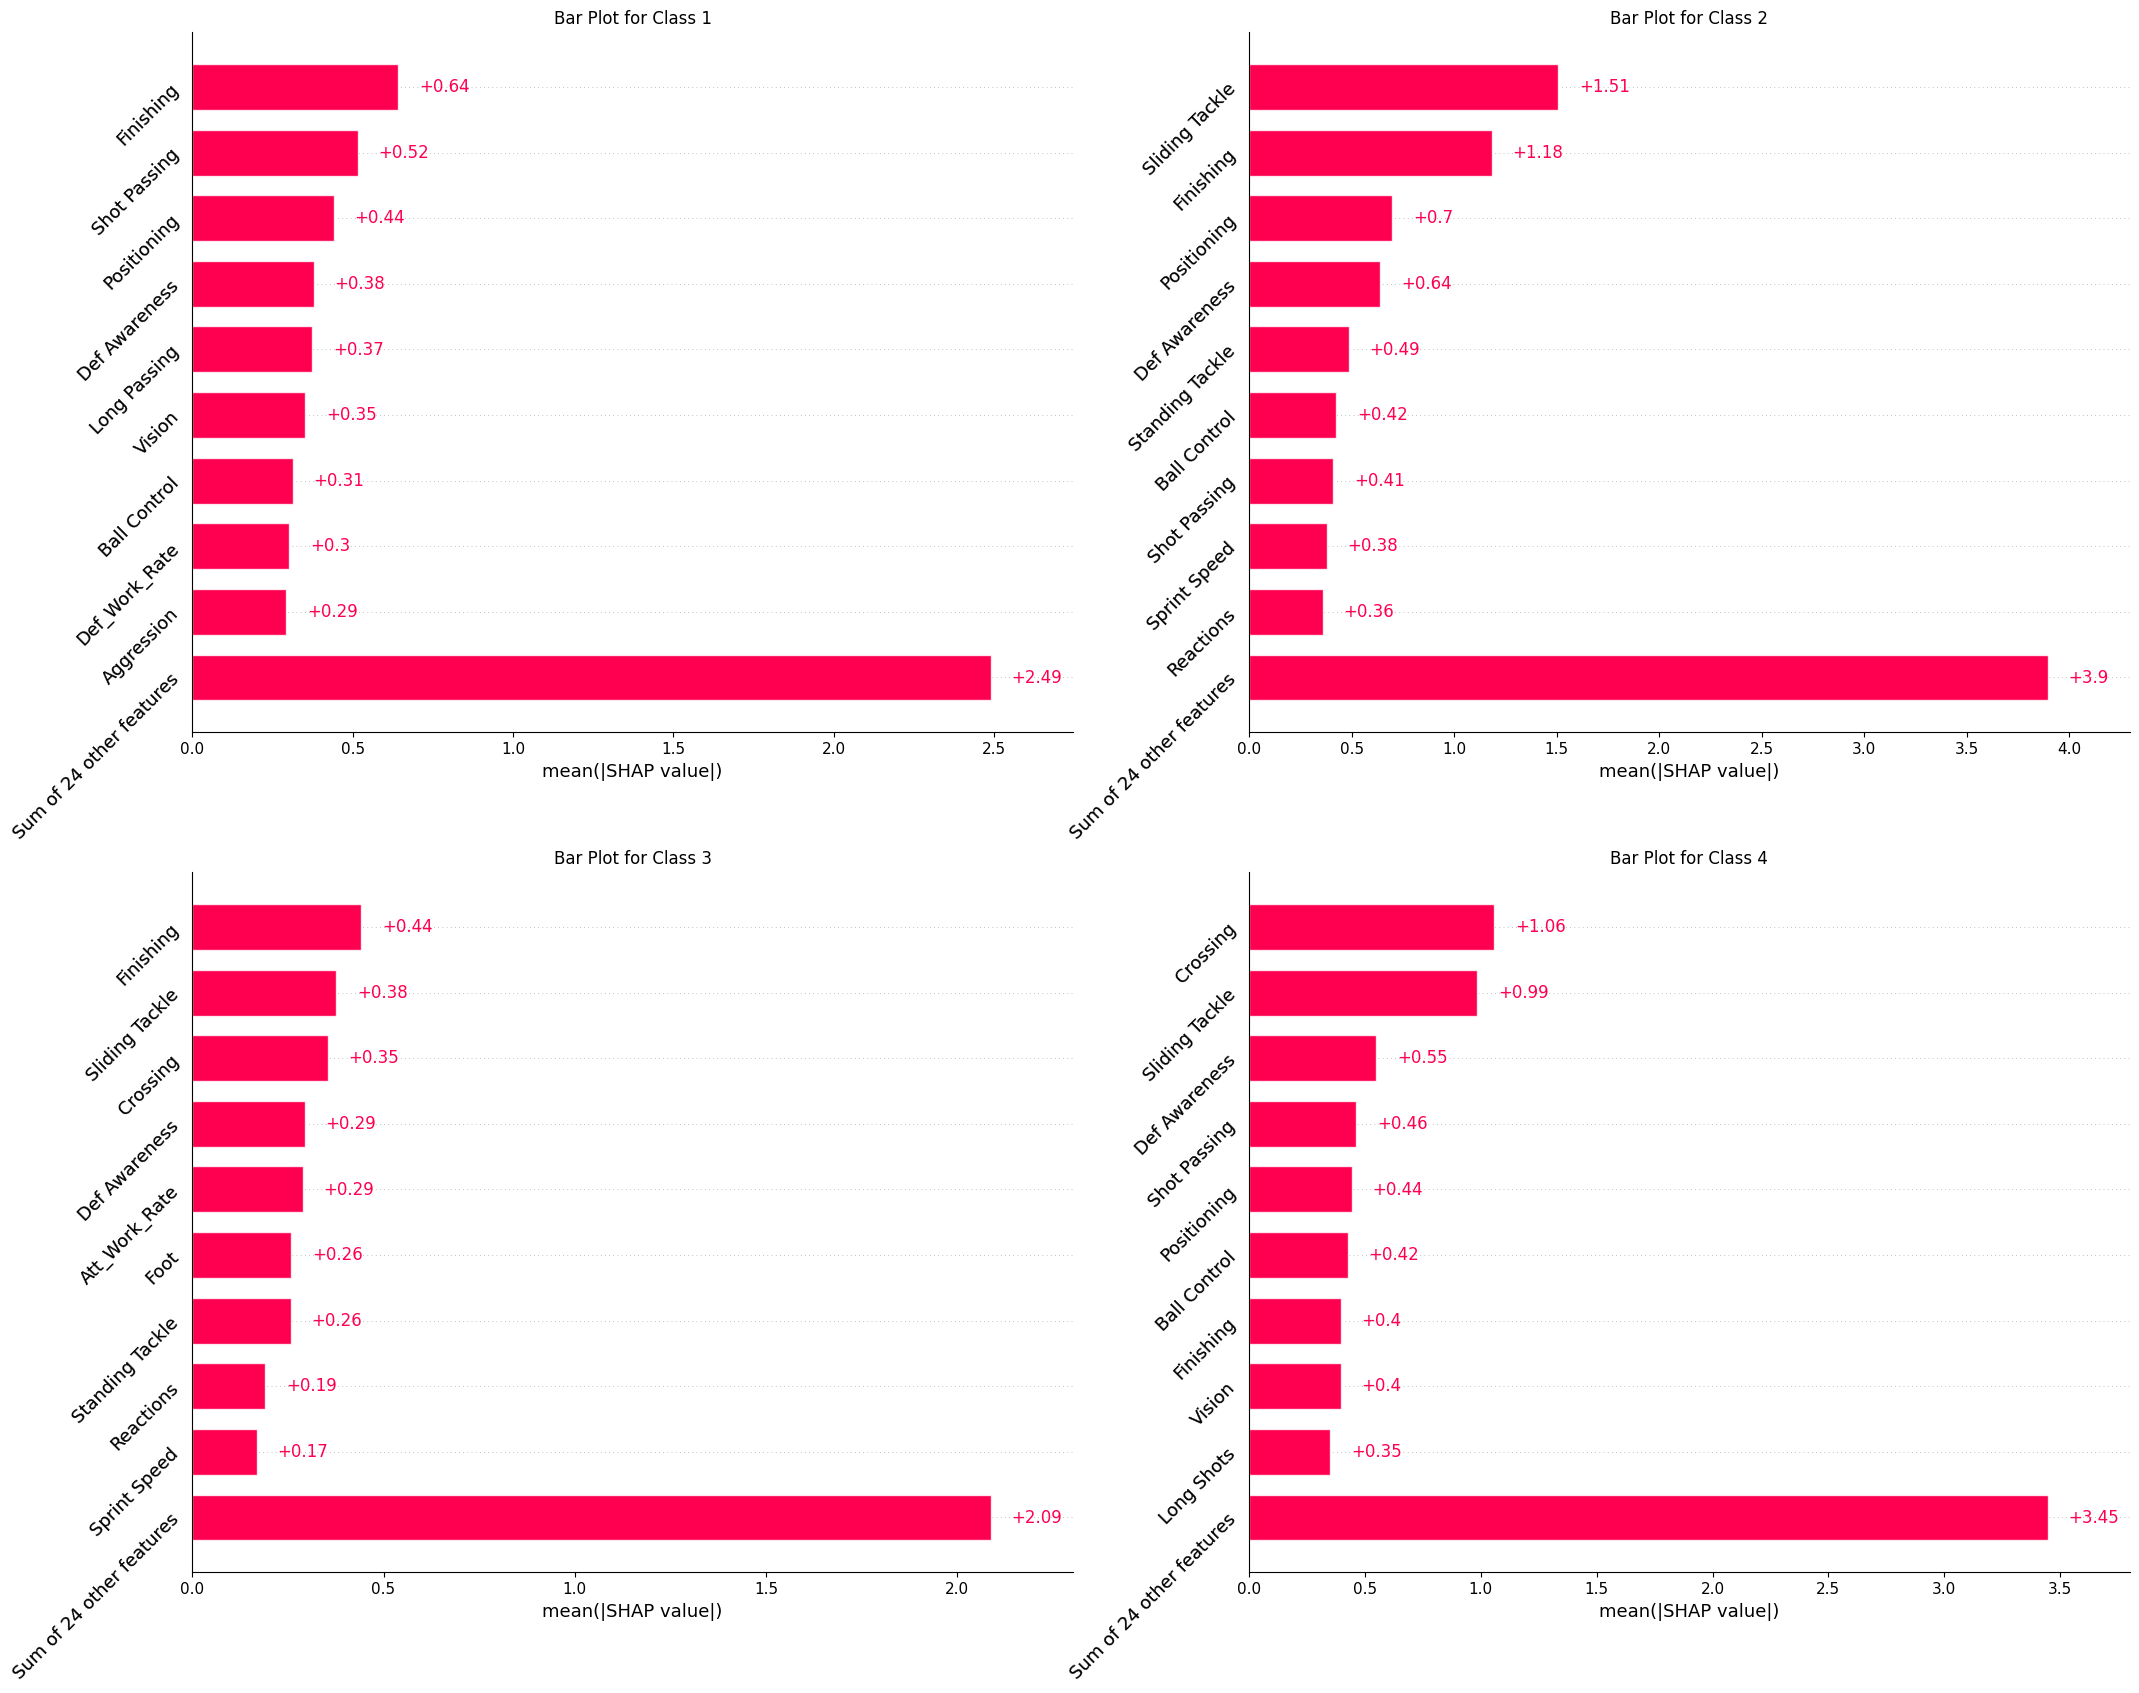

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Tüm veri seti üzerinde SHAP değerlerini hesapla
shap_values_l2 = explainer_l2.shap_values(X_test_scaled)

# Her bir sınıf için ayrı ayrı SHAP değerlerini topla
classwise_shap_values = [np.array([shap_values_l2[i][class_index] for i in range(len(shap_values_l2))]) for class_index in range(len(explainer_l2.expected_value))]

# Her bir sınıf için ayrı ayrı bar plot'ları çiz
for class_index in range(len(explainer_l2.expected_value)):
    plt.subplot(2, 2, class_index + 1) # 2x2 alt grafik düzeni
    
    # Explanation objesini oluştur
    shap_values_for_class = classwise_shap_values[class_index]
    expected_value = explainer_l2.expected_value[class_index]
    shap_values_explanation = shap.Explanation(values=shap_values_for_class, base_values=expected_value ,feature_names=X_train.columns)


    # Bar plot'u çiz
    shap.plots.bar(shap_values_explanation, show=False)
    plt.title(f'Bar Plot for Class {class_index + 1}')
    
    # Y eksenindeki feature değerlerini 45 derece açıyla yazdır
    plt.yticks(rotation=45)
    
    plt.gcf().set_size_inches(25, 20) # Ayarladığınız boyutu burada değiştirebilirsiniz

plt.show()
